In [273]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)
from numpy.random import seed
seed(123)
from keras.models import Sequential
from keras.layers import Dense

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from keras.callbacks import History
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

from keras.layers import Normalization

2.8.2
2.8.0


Zbiór danych https://www.kaggle.com/datasets/ketangangal/heart-disease-dataset-uci


In [274]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [275]:
print('GPU name: ', tf.config.experimental.list_physical_devices('GPU'))

GPU name:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [276]:
df = pd.read_csv('HeartDiseaseData.csv')
df.head()

age     sex chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    Male  Typical angina                     125          212   
1   53    Male  Typical angina                     140          203   
2   70    Male  Typical angina                     145          174   
3   61    Male  Typical angina                     148          203   
4   62  Female  Typical angina                     138          294   

      fasting_blood_sugar               rest_ecg  Max_heart_rate  \
0    Lower than 120 mg/ml  ST-T wave abnormality             168   
1  Greater than 120 mg/ml                 Normal             155   
2    Lower than 120 mg/ml  ST-T wave abnormality             125   
3    Lower than 120 mg/ml  ST-T wave abnormality             161   
4  Greater than 120 mg/ml  ST-T wave abnormality             106   

  exercise_induced_angina  oldpeak        slope vessels_colored_by_flourosopy  \
0                      No      1.0  Downsloping                           Two   
1                     Yes      3.1    Upsloping                          Zero   
2                     Yes      2.6    Upsloping                          Zero   
3                      No      0.0  Downsloping                           One   
4                      No      1.9         Flat                         Three   

         thalassemia  target  
0  Reversable Defect       0  
1  Reversable Defect       0  
2  Reversable Defect       0  
3  Reversable Defect       0  
4       Fixed Defect       0

age, sex \\
chest_pain_type - rodzaje bólów w klatce piersiowej 0 - brak, 1 - ból bez duszności, 2 - ból i nieregularne duszności, 3 - ból i duszności \\
resting_blood_pressure - spoczynkowe ciśnienie krwi \\
cholestoral - poziom cholesterolu \\
fasting_blood_sugar - poziom cukru na czczo (0 - za wyoski, 1 - w normie) \\
rest_ecg - ocena wyników elektrokardiogramu (2 - w normie, 1 - drobne zaburzenia, 0 - nieprawidłowa praca serca) \\
Max_heart_rate - tętno \\
exercise_induced_angina - ból/dyskomfort w klatce piersiowej \\
oldpeak - obniżenie odcinka ST \\
slope - zmiana w odstępie ST  (0 - spadek, 1 -  spłaszczenie, 2 - wzrost) \\
vessels_colored_by_flourosopy - liczba głównych naczyń krwionośnych z nieprawidłowym przepływe (0-3) \\
thalassemia - niedokrwistość tarczowatokrwinkowa \\
target - w późniejszych badaniach zdiagnozowano chorobę serca (0 - Nie, 1 - Tak) 

<figure>
<center>
<img src='https://kredos.pl/images/artyku%C5%82y/ekg_zespol_qrs.jpg' />
</figure>

In [277]:
from sklearn.preprocessing import LabelEncoder

for col in ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina','slope', 'vessels_colored_by_flourosopy', 'thalassemia']:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])

df.drop(['vessels_colored_by_flourosopy'], axis = 1, inplace = True)
df['rest_ecg'] = df['rest_ecg'].replace({2. : 0., 0. : 2.})
df['thalassemia'] = df['thalassemia'].replace({3. : 1., 1. : 3.})
df.head()

age  sex  chest_pain_type  resting_blood_pressure  cholestoral  \
0   52    1                3                     125          212   
1   53    1                3                     140          203   
2   70    1                3                     145          174   
3   61    1                3                     148          203   
4   62    0                3                     138          294   

   fasting_blood_sugar  rest_ecg  Max_heart_rate  exercise_induced_angina  \
0                    1       0.0             168                        0   
1                    0       1.0             155                        1   
2                    1       0.0             125                        1   
3                    1       0.0             161                        0   
4                    0       0.0             106                        0   

   oldpeak  slope  thalassemia  target  
0      1.0      0          1.0       0  
1      3.1      2          1.0       0  
2      2.6      2          1.0       0  
3      0.0      0          1.0       0  
4      1.9      1          0.0       0

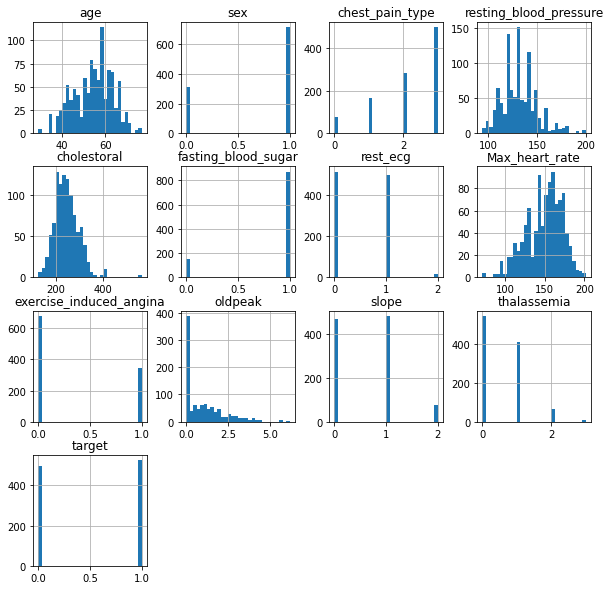

In [278]:
df.hist(bins=30, figsize = (10,10));

In [279]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1),
                                                    df['target'],
                                                    test_size=0.15,
                                                    random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

print('Train:', y_train.size, 'Val:', y_val.size,'Test:', y_test.size)

scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

Train: 696 Val: 175 Test: 154


In [280]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, mode='min', verbose=1)

In [281]:
model1 = keras.Sequential([
    Dense(1024, activation='relu', input_shape=[X_train.shape[1]]),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model1.summary()

Model: "sequential_585"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3510 (Dense)          (None, 1024)              13312     
                                                                 
 dense_3511 (Dense)          (None, 512)               524800    
                                                                 
 dense_3512 (Dense)          (None, 512)               262656    
                                                                 
 dense_3513 (Dense)          (None, 256)               131328    
                                                                 
 dense_3514 (Dense)          (None, 128)               32896     
                                                                 
 dense_3515 (Dense)          (None, 1)                 129       
                                                                 
Total params: 965,121
Trainable params: 965,121
Non-

In [282]:
model_dropout = keras.Sequential([
    Dense(1024, activation='relu', input_shape=[X_train.shape[1]]),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid'),
])
model_dropout.summary()

Model: "sequential_586"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3516 (Dense)          (None, 1024)              13312     
                                                                 
 dropout_1910 (Dropout)      (None, 1024)              0         
                                                                 
 dense_3517 (Dense)          (None, 512)               524800    
                                                                 
 dropout_1911 (Dropout)      (None, 512)               0         
                                                                 
 dense_3518 (Dense)          (None, 512)               262656    
                                                                 
 dropout_1912 (Dropout)      (None, 512)               0         
                                                                 
 dense_3519 (Dense)          (None, 256)            

In [283]:
model_BatchNormalization = keras.Sequential([
    Dense(1024, input_shape=[X_train.shape[1]]),
    BatchNormalization(),
    Activation('relu'),
    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_BatchNormalization.summary()

Model: "sequential_587"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3522 (Dense)          (None, 1024)              13312     
                                                                 
 batch_normalization_2266 (B  (None, 1024)             4096      
 atchNormalization)                                              
                                                                 
 activation_2260 (Activation  (None, 1024)             0         
 )                                                               
                                                                 
 dense_3523 (Dense)          (None, 512)               524800    
                                                                 
 batch_normalization_2267 (B  (None, 512)              2048      
 atchNormalization)                                              
                                                    

In [284]:
model_D_BN = keras.Sequential([                
    Dense(1024, input_shape=[X_train.shape[1]]),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_D_BN.summary()

Model: "sequential_588"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3528 (Dense)          (None, 1024)              13312     
                                                                 
 batch_normalization_2270 (B  (None, 1024)             4096      
 atchNormalization)                                              
                                                                 
 activation_2264 (Activation  (None, 1024)             0         
 )                                                               
                                                                 
 dropout_1915 (Dropout)      (None, 1024)              0         
                                                                 
 dense_3529 (Dense)          (None, 512)               524800    
                                                                 
 batch_normalization_2271 (B  (None, 512)           

Epoch 16: early stopping


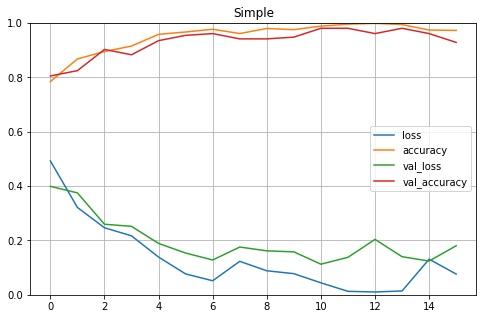

Epoch 29: early stopping


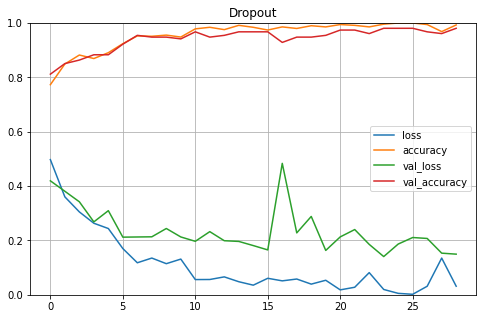

Epoch 20: early stopping


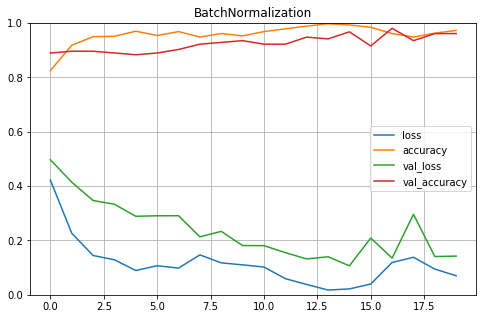

Epoch 22: early stopping


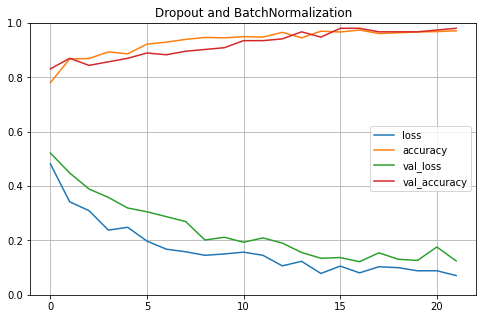

In [285]:
epochs = 100
batch_size = 32


models = []
models.append(('Simple', model1))
models.append(('Dropout', model_dropout))
models.append(('BatchNormalization', model_BatchNormalization))
models.append(('Dropout and BatchNormalization', model_D_BN))

for name, model in models:
    history = History()
    model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"]) #tf.keras.metrics.Recall()
    history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=batch_size, epochs=epochs, callbacks=[early_stopping], verbose=0)
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.title(name)
    plt.show()


In [326]:
batch_size_list = [16, 32, 64]
lr_list = [0.0001, 0.0005, 0.001, 0.005, 0.01]
dropout_p = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

Epoch 23: early stopping


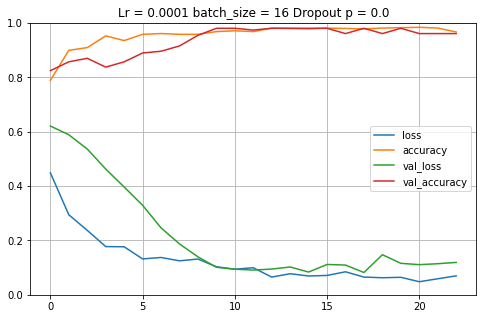

Lr = 0.0001 batch_size = 16 Dropout p = 0.0
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 34: early stopping


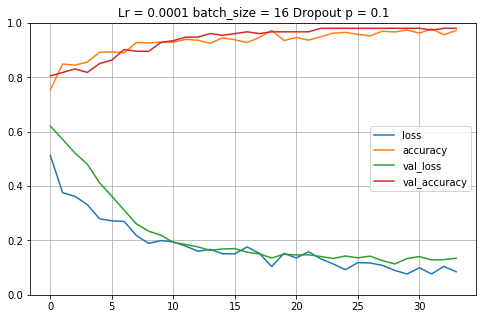

Lr = 0.0001 batch_size = 16 Dropout p = 0.1
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 38: early stopping


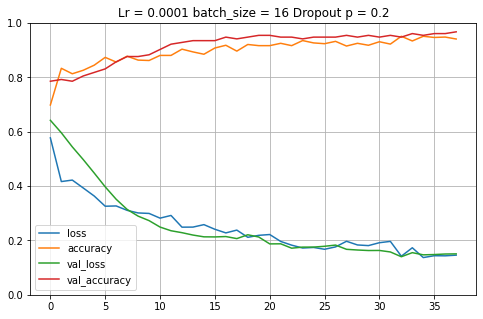

Lr = 0.0001 batch_size = 16 Dropout p = 0.2
precision_score: 0.9659090909090909
recall_score: 0.9239130434782609
f1_score: 0.9444444444444444
accuracy_score: 0.9428571428571428
Epoch 47: early stopping


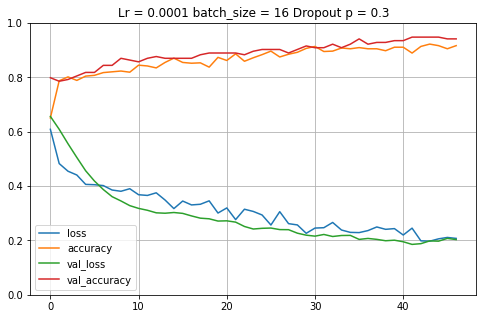

Lr = 0.0001 batch_size = 16 Dropout p = 0.3
precision_score: 0.9340659340659341
recall_score: 0.9239130434782609
f1_score: 0.9289617486338797
accuracy_score: 0.9257142857142857
Epoch 53: early stopping


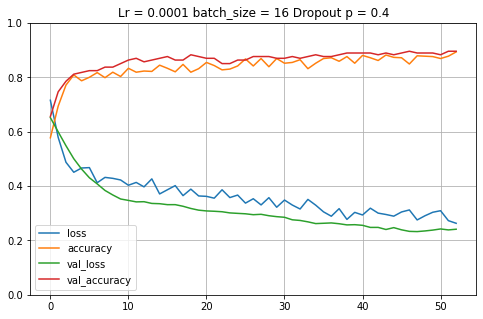

Lr = 0.0001 batch_size = 16 Dropout p = 0.4
precision_score: 0.9310344827586207
recall_score: 0.8804347826086957
f1_score: 0.9050279329608939
accuracy_score: 0.9028571428571428
Epoch 97: early stopping


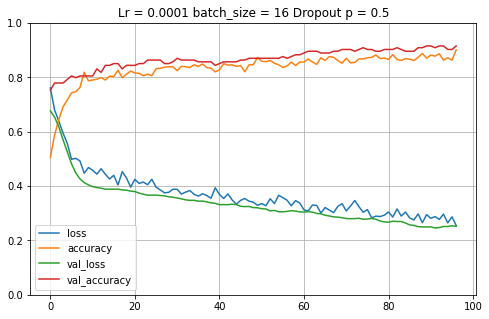

Lr = 0.0001 batch_size = 16 Dropout p = 0.5
precision_score: 0.9204545454545454
recall_score: 0.8804347826086957
f1_score: 0.8999999999999999
accuracy_score: 0.8971428571428571
Epoch 31: early stopping


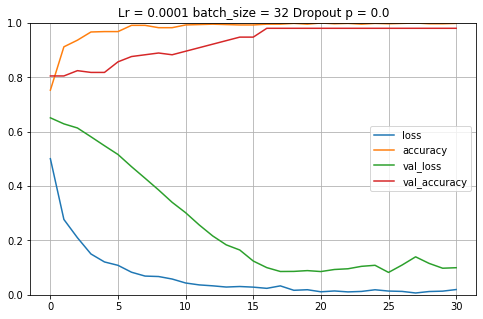

Lr = 0.0001 batch_size = 32 Dropout p = 0.0
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 28: early stopping


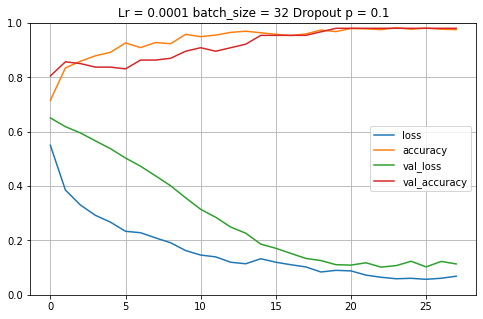

Lr = 0.0001 batch_size = 32 Dropout p = 0.1
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 47: early stopping


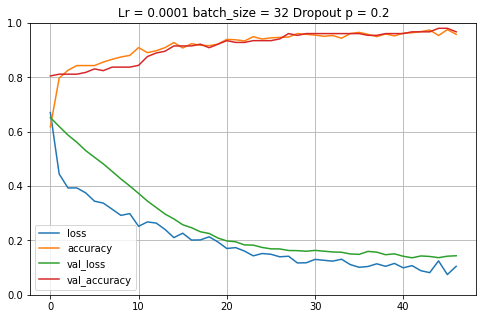

Lr = 0.0001 batch_size = 32 Dropout p = 0.2
precision_score: 0.967391304347826
recall_score: 0.967391304347826
f1_score: 0.967391304347826
accuracy_score: 0.9657142857142857
Epoch 93: early stopping


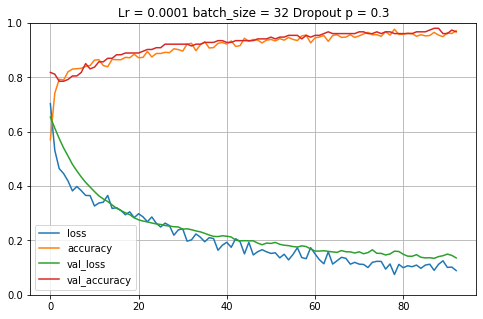

Lr = 0.0001 batch_size = 32 Dropout p = 0.3
precision_score: 0.967391304347826
recall_score: 0.967391304347826
f1_score: 0.967391304347826
accuracy_score: 0.9657142857142857
Epoch 78: early stopping


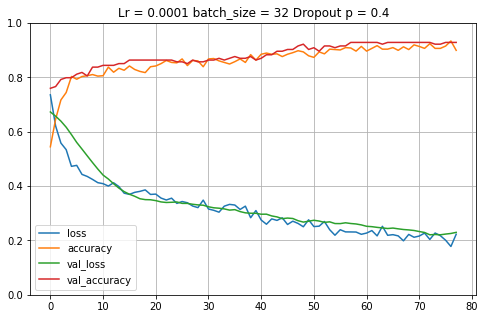

Lr = 0.0001 batch_size = 32 Dropout p = 0.4
precision_score: 0.9340659340659341
recall_score: 0.9239130434782609
f1_score: 0.9289617486338797
accuracy_score: 0.9257142857142857
Epoch 88: early stopping


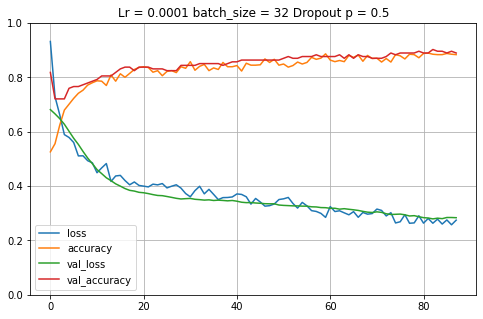

Lr = 0.0001 batch_size = 32 Dropout p = 0.5
precision_score: 0.9176470588235294
recall_score: 0.8478260869565217
f1_score: 0.8813559322033897
accuracy_score: 0.88
Epoch 44: early stopping


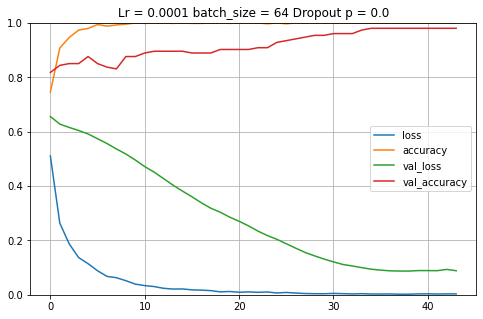

Lr = 0.0001 batch_size = 64 Dropout p = 0.0
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 44: early stopping


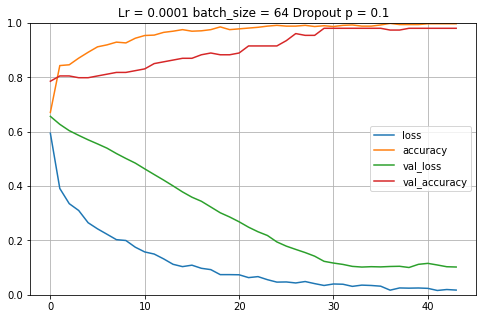

Lr = 0.0001 batch_size = 64 Dropout p = 0.1
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 52: early stopping


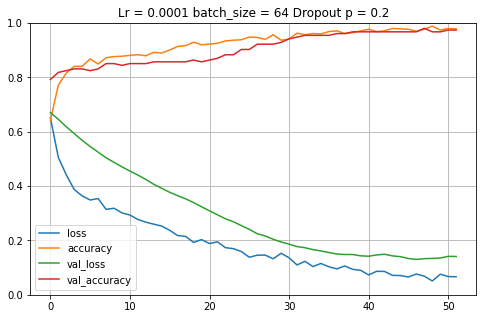

Lr = 0.0001 batch_size = 64 Dropout p = 0.2
precision_score: 0.978021978021978
recall_score: 0.967391304347826
f1_score: 0.9726775956284153
accuracy_score: 0.9714285714285714
Epoch 69: early stopping


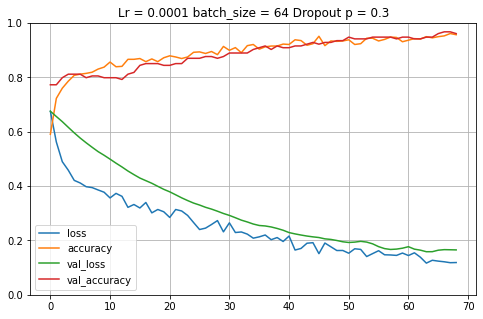

Lr = 0.0001 batch_size = 64 Dropout p = 0.3
precision_score: 0.9659090909090909
recall_score: 0.9239130434782609
f1_score: 0.9444444444444444
accuracy_score: 0.9428571428571428
Epoch 92: early stopping


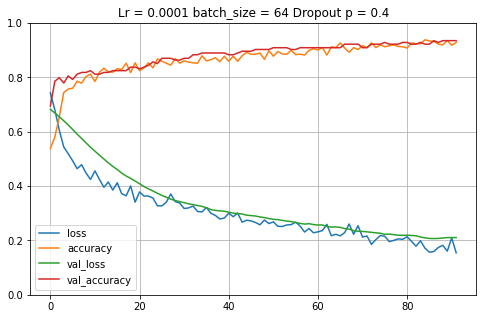

Lr = 0.0001 batch_size = 64 Dropout p = 0.4
precision_score: 0.9534883720930233
recall_score: 0.8913043478260869
f1_score: 0.9213483146067417
accuracy_score: 0.92


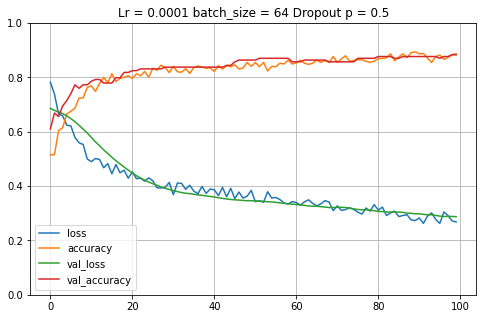

Lr = 0.0001 batch_size = 64 Dropout p = 0.5
precision_score: 0.9146341463414634
recall_score: 0.8152173913043478
f1_score: 0.8620689655172414
accuracy_score: 0.8628571428571429
Epoch 13: early stopping


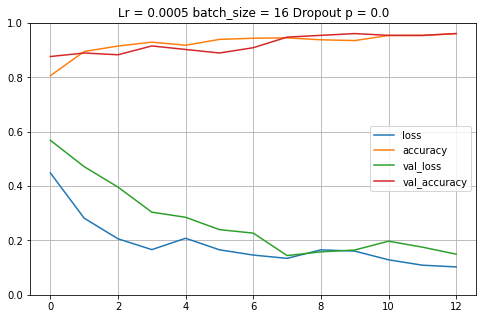

Lr = 0.0005 batch_size = 16 Dropout p = 0.0
precision_score: 0.967391304347826
recall_score: 0.967391304347826
f1_score: 0.967391304347826
accuracy_score: 0.9657142857142857
Epoch 22: early stopping


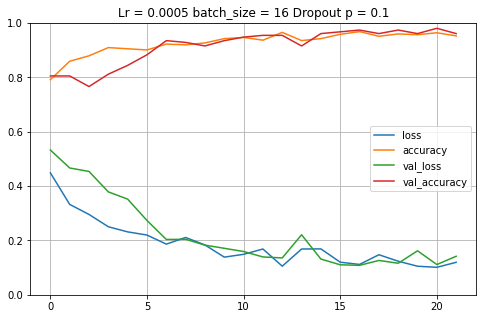

Lr = 0.0005 batch_size = 16 Dropout p = 0.1
precision_score: 0.967391304347826
recall_score: 0.967391304347826
f1_score: 0.967391304347826
accuracy_score: 0.9657142857142857
Epoch 21: early stopping


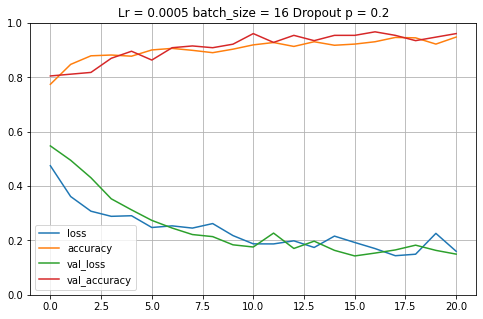

Lr = 0.0005 batch_size = 16 Dropout p = 0.2
precision_score: 0.967741935483871
recall_score: 0.9782608695652174
f1_score: 0.972972972972973
accuracy_score: 0.9714285714285714
Epoch 23: early stopping


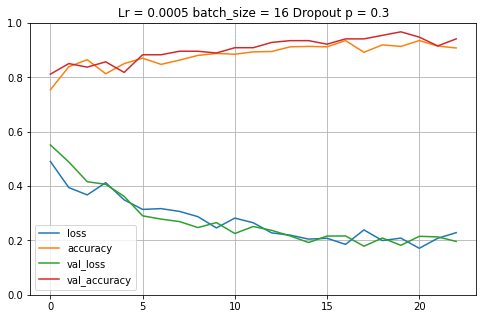

Lr = 0.0005 batch_size = 16 Dropout p = 0.3
precision_score: 0.9130434782608695
recall_score: 0.9130434782608695
f1_score: 0.9130434782608695
accuracy_score: 0.9085714285714286
Epoch 23: early stopping


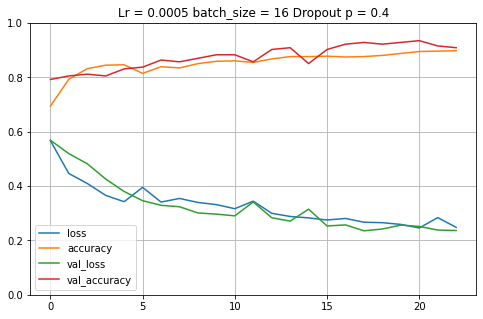

Lr = 0.0005 batch_size = 16 Dropout p = 0.4
precision_score: 0.9325842696629213
recall_score: 0.9021739130434783
f1_score: 0.9171270718232043
accuracy_score: 0.9142857142857143
Epoch 36: early stopping


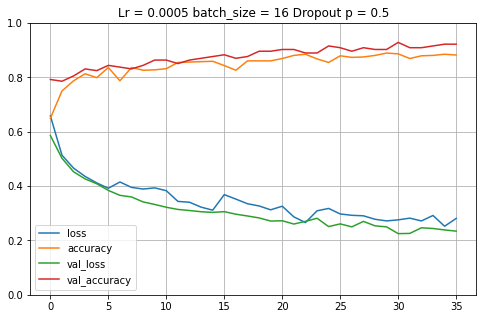

Lr = 0.0005 batch_size = 16 Dropout p = 0.5
precision_score: 0.9325842696629213
recall_score: 0.9021739130434783
f1_score: 0.9171270718232043
accuracy_score: 0.9142857142857143
Epoch 23: early stopping


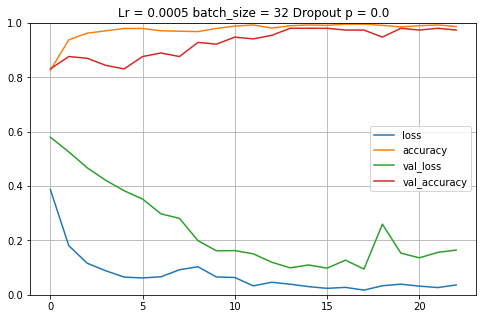

Lr = 0.0005 batch_size = 32 Dropout p = 0.0
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 21: early stopping


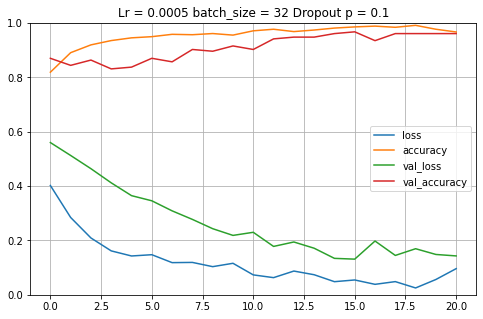

Lr = 0.0005 batch_size = 32 Dropout p = 0.1
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 23: early stopping


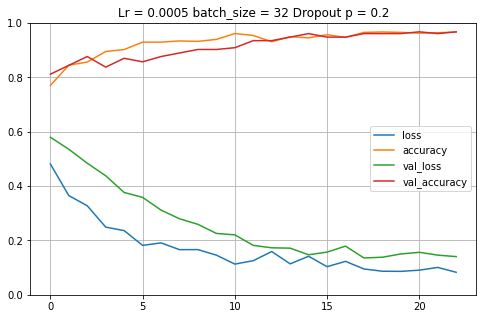

Lr = 0.0005 batch_size = 32 Dropout p = 0.2
precision_score: 0.9375
recall_score: 0.9782608695652174
f1_score: 0.9574468085106383
accuracy_score: 0.9542857142857143
Epoch 38: early stopping


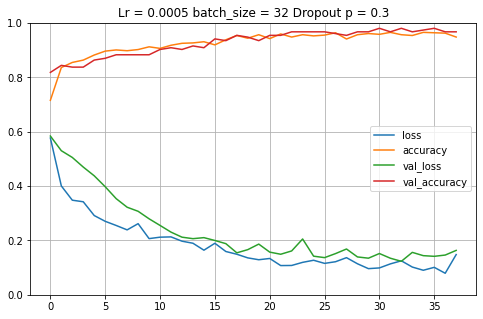

Lr = 0.0005 batch_size = 32 Dropout p = 0.3
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 37: early stopping


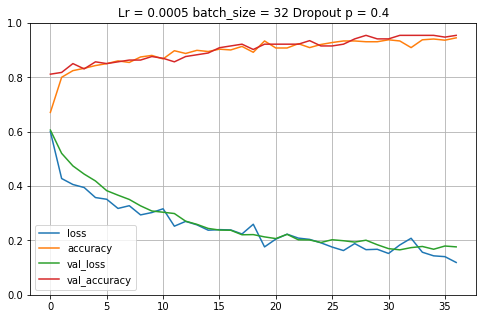

Lr = 0.0005 batch_size = 32 Dropout p = 0.4
precision_score: 0.963855421686747
recall_score: 0.8695652173913043
f1_score: 0.9142857142857143
accuracy_score: 0.9142857142857143
Epoch 47: early stopping


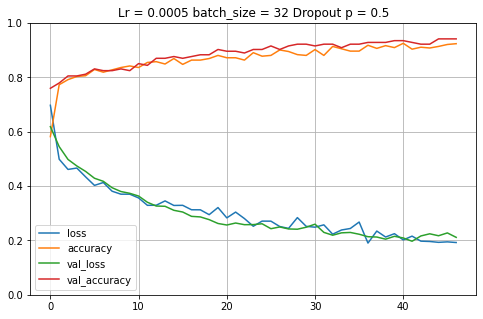

Lr = 0.0005 batch_size = 32 Dropout p = 0.5
precision_score: 0.9425287356321839
recall_score: 0.8913043478260869
f1_score: 0.9162011173184358
accuracy_score: 0.9142857142857143
Epoch 35: early stopping


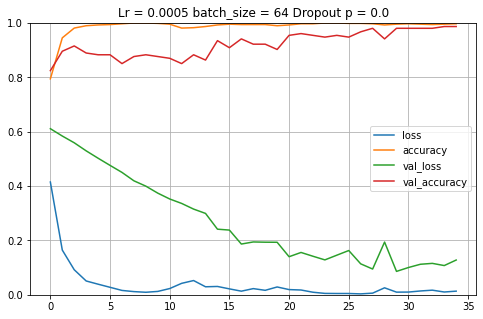

Lr = 0.0005 batch_size = 64 Dropout p = 0.0
precision_score: 0.968421052631579
recall_score: 1.0
f1_score: 0.983957219251337
accuracy_score: 0.9828571428571429
Epoch 32: early stopping


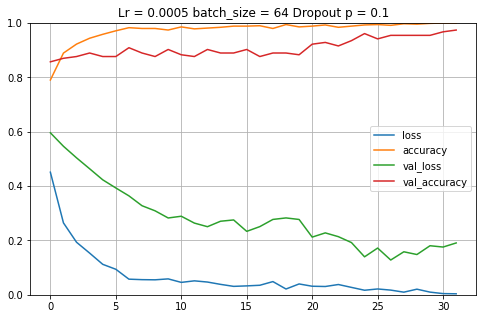

Lr = 0.0005 batch_size = 64 Dropout p = 0.1
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 32: early stopping


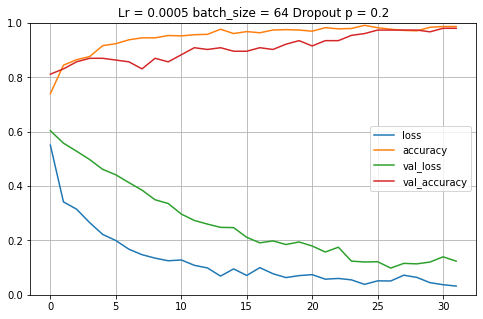

Lr = 0.0005 batch_size = 64 Dropout p = 0.2
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 40: early stopping


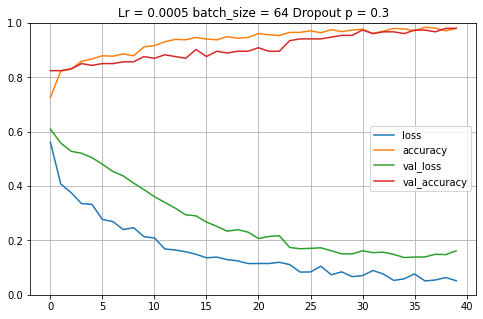

Lr = 0.0005 batch_size = 64 Dropout p = 0.3
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 46: early stopping


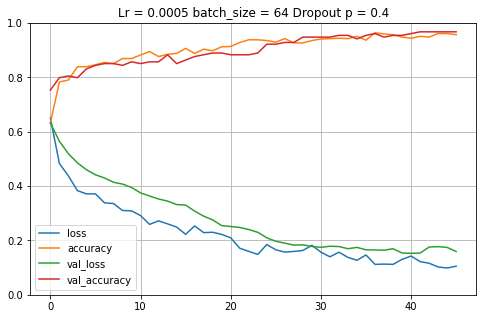

Lr = 0.0005 batch_size = 64 Dropout p = 0.4
precision_score: 0.967032967032967
recall_score: 0.9565217391304348
f1_score: 0.9617486338797815
accuracy_score: 0.96
Epoch 54: early stopping


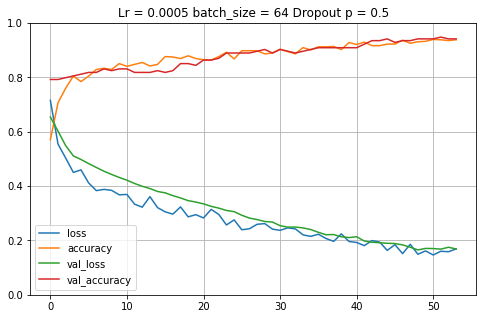

Lr = 0.0005 batch_size = 64 Dropout p = 0.5
precision_score: 0.9647058823529412
recall_score: 0.8913043478260869
f1_score: 0.9265536723163841
accuracy_score: 0.9257142857142857
Epoch 17: early stopping


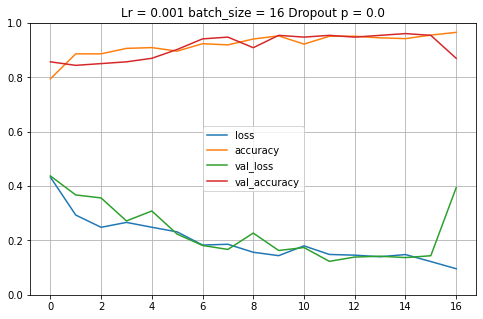

Lr = 0.001 batch_size = 16 Dropout p = 0.0
precision_score: 0.9354838709677419
recall_score: 0.9456521739130435
f1_score: 0.9405405405405404
accuracy_score: 0.9371428571428572
Epoch 18: early stopping


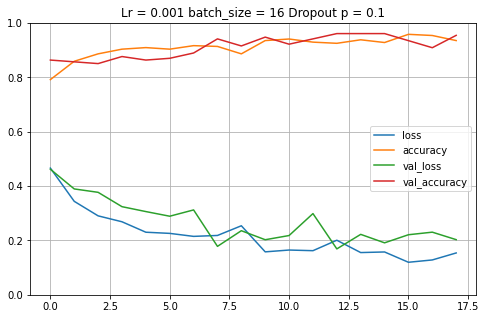

Lr = 0.001 batch_size = 16 Dropout p = 0.1
precision_score: 0.9560439560439561
recall_score: 0.9456521739130435
f1_score: 0.9508196721311475
accuracy_score: 0.9485714285714286
Epoch 16: early stopping


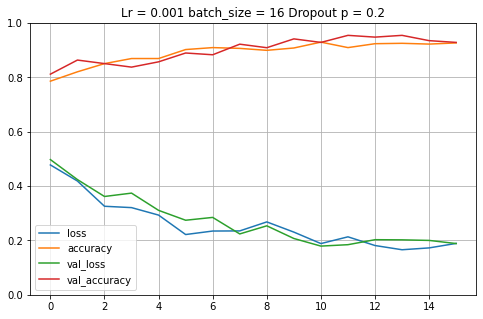

Lr = 0.001 batch_size = 16 Dropout p = 0.2
precision_score: 0.9239130434782609
recall_score: 0.9239130434782609
f1_score: 0.9239130434782609
accuracy_score: 0.92
Epoch 30: early stopping


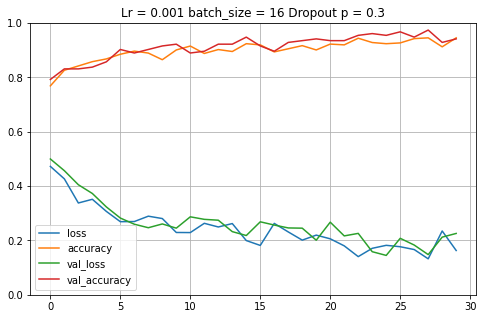

Lr = 0.001 batch_size = 16 Dropout p = 0.3
precision_score: 0.9545454545454546
recall_score: 0.9130434782608695
f1_score: 0.9333333333333332
accuracy_score: 0.9314285714285714
Epoch 32: early stopping


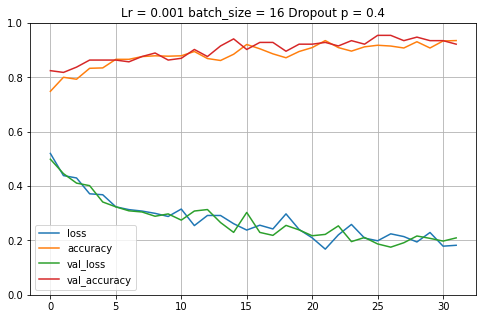

Lr = 0.001 batch_size = 16 Dropout p = 0.4
precision_score: 0.9340659340659341
recall_score: 0.9239130434782609
f1_score: 0.9289617486338797
accuracy_score: 0.9257142857142857
Epoch 38: early stopping


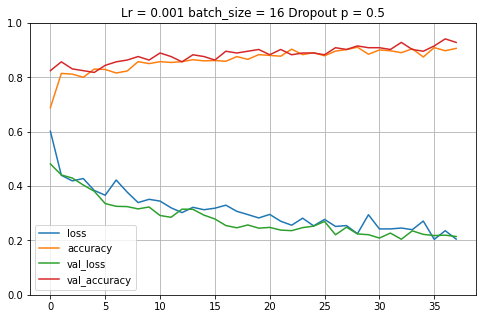

Lr = 0.001 batch_size = 16 Dropout p = 0.5
precision_score: 0.9418604651162791
recall_score: 0.8804347826086957
f1_score: 0.9101123595505618
accuracy_score: 0.9085714285714286
Epoch 25: early stopping


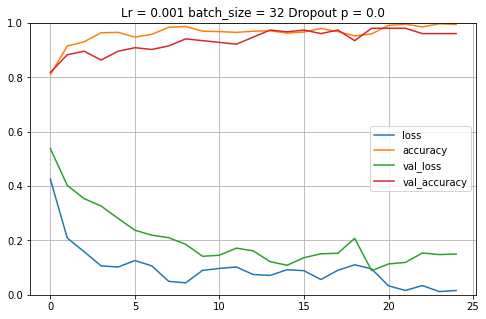

Lr = 0.001 batch_size = 32 Dropout p = 0.0
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 22: early stopping


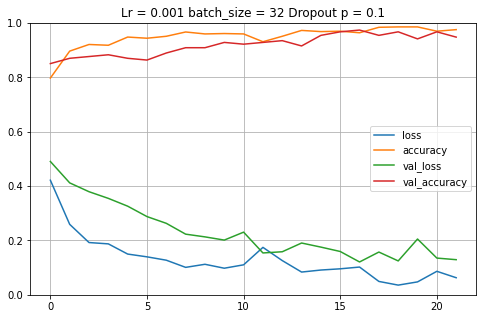

Lr = 0.001 batch_size = 32 Dropout p = 0.1
precision_score: 0.9770114942528736
recall_score: 0.9239130434782609
f1_score: 0.9497206703910613
accuracy_score: 0.9485714285714286
Epoch 22: early stopping


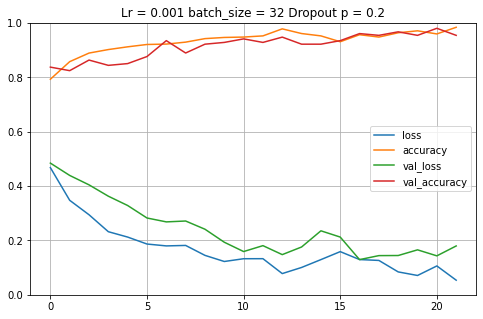

Lr = 0.001 batch_size = 32 Dropout p = 0.2
precision_score: 0.978021978021978
recall_score: 0.967391304347826
f1_score: 0.9726775956284153
accuracy_score: 0.9714285714285714
Epoch 23: early stopping


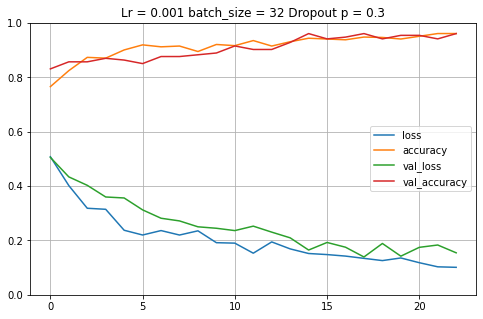

Lr = 0.001 batch_size = 32 Dropout p = 0.3
precision_score: 0.967391304347826
recall_score: 0.967391304347826
f1_score: 0.967391304347826
accuracy_score: 0.9657142857142857
Epoch 24: early stopping


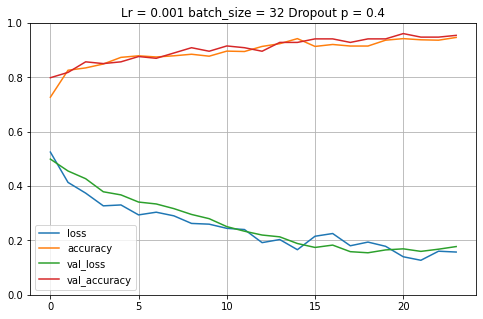

Lr = 0.001 batch_size = 32 Dropout p = 0.4
precision_score: 0.9659090909090909
recall_score: 0.9239130434782609
f1_score: 0.9444444444444444
accuracy_score: 0.9428571428571428
Epoch 27: early stopping


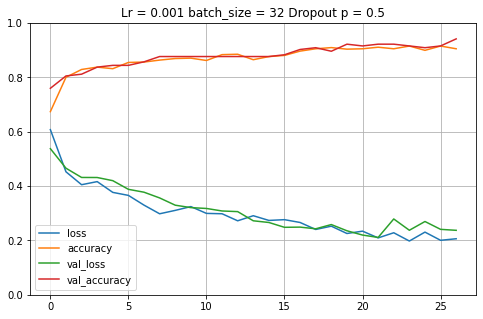

Lr = 0.001 batch_size = 32 Dropout p = 0.5
precision_score: 0.9534883720930233
recall_score: 0.8913043478260869
f1_score: 0.9213483146067417
accuracy_score: 0.92
Epoch 18: early stopping


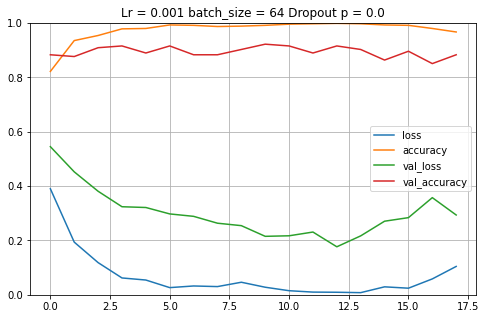

Lr = 0.001 batch_size = 64 Dropout p = 0.0
precision_score: 0.9325842696629213
recall_score: 0.9021739130434783
f1_score: 0.9171270718232043
accuracy_score: 0.9142857142857143
Epoch 24: early stopping


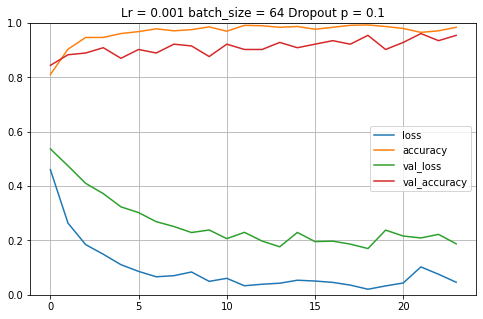

Lr = 0.001 batch_size = 64 Dropout p = 0.1
precision_score: 0.9278350515463918
recall_score: 0.9782608695652174
f1_score: 0.9523809523809524
accuracy_score: 0.9485714285714286
Epoch 23: early stopping


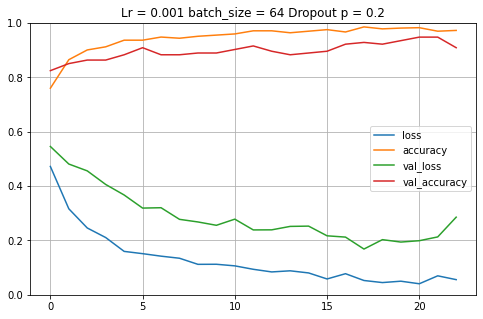

Lr = 0.001 batch_size = 64 Dropout p = 0.2
precision_score: 0.9166666666666666
recall_score: 0.9565217391304348
f1_score: 0.9361702127659574
accuracy_score: 0.9314285714285714
Epoch 35: early stopping


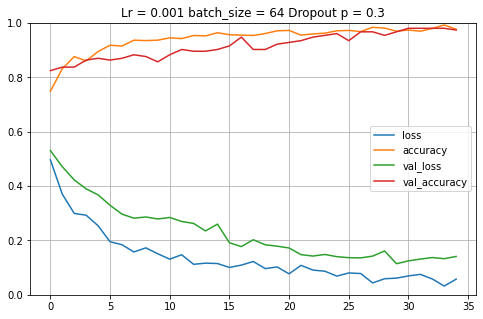

Lr = 0.001 batch_size = 64 Dropout p = 0.3
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 32: early stopping


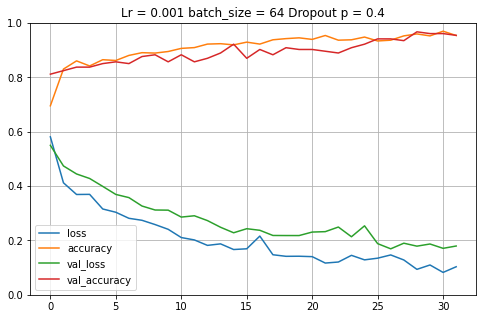

Lr = 0.001 batch_size = 64 Dropout p = 0.4
precision_score: 0.9666666666666667
recall_score: 0.9456521739130435
f1_score: 0.956043956043956
accuracy_score: 0.9542857142857143
Epoch 52: early stopping


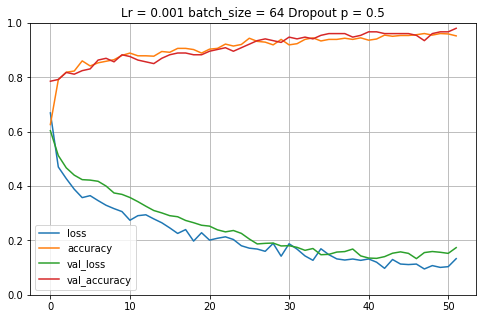

Lr = 0.001 batch_size = 64 Dropout p = 0.5
precision_score: 0.9777777777777777
recall_score: 0.9565217391304348
f1_score: 0.967032967032967
accuracy_score: 0.9657142857142857
Epoch 19: early stopping


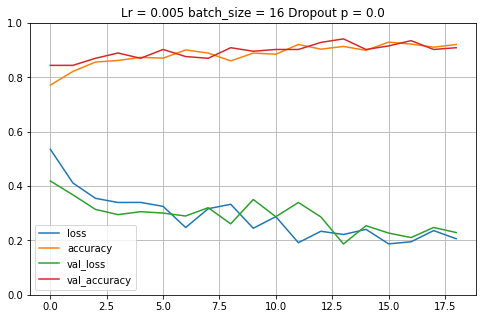

Lr = 0.005 batch_size = 16 Dropout p = 0.0
precision_score: 0.9523809523809523
recall_score: 0.8695652173913043
f1_score: 0.909090909090909
accuracy_score: 0.9085714285714286
Epoch 12: early stopping


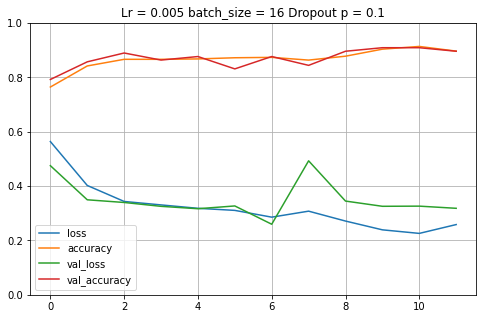

Lr = 0.005 batch_size = 16 Dropout p = 0.1
precision_score: 0.9058823529411765
recall_score: 0.8369565217391305
f1_score: 0.8700564971751413
accuracy_score: 0.8685714285714285
Epoch 30: early stopping


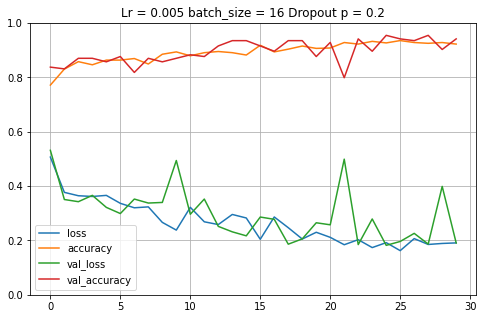

Lr = 0.005 batch_size = 16 Dropout p = 0.2
precision_score: 0.9375
recall_score: 0.9782608695652174
f1_score: 0.9574468085106383
accuracy_score: 0.9542857142857143
Epoch 15: early stopping


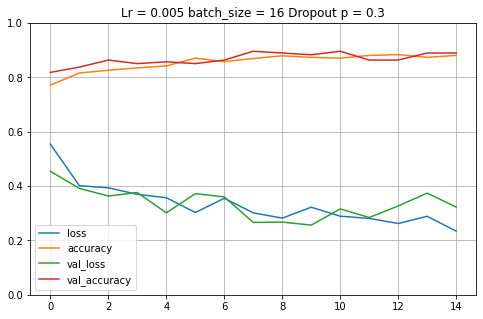

Lr = 0.005 batch_size = 16 Dropout p = 0.3
precision_score: 0.8645833333333334
recall_score: 0.9021739130434783
f1_score: 0.8829787234042554
accuracy_score: 0.8742857142857143
Epoch 21: early stopping


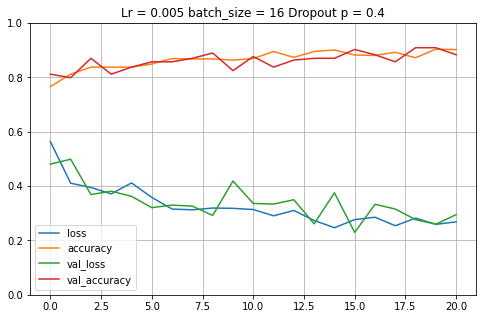

Lr = 0.005 batch_size = 16 Dropout p = 0.4
precision_score: 0.9
recall_score: 0.8804347826086957
f1_score: 0.8901098901098902
accuracy_score: 0.8857142857142857
Epoch 21: early stopping


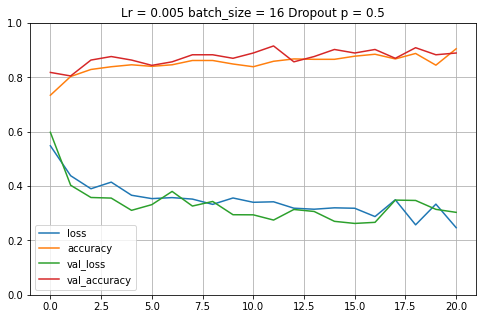

Lr = 0.005 batch_size = 16 Dropout p = 0.5
precision_score: 0.8865979381443299
recall_score: 0.9347826086956522
f1_score: 0.91005291005291
accuracy_score: 0.9028571428571428
Epoch 24: early stopping


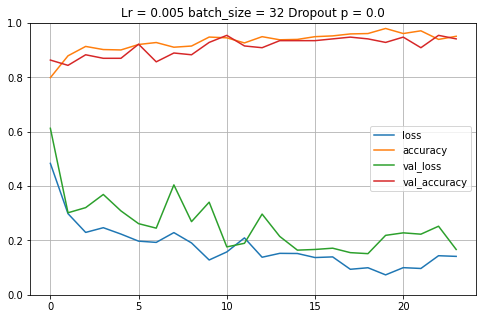

Lr = 0.005 batch_size = 32 Dropout p = 0.0
precision_score: 0.967391304347826
recall_score: 0.967391304347826
f1_score: 0.967391304347826
accuracy_score: 0.9657142857142857
Epoch 14: early stopping


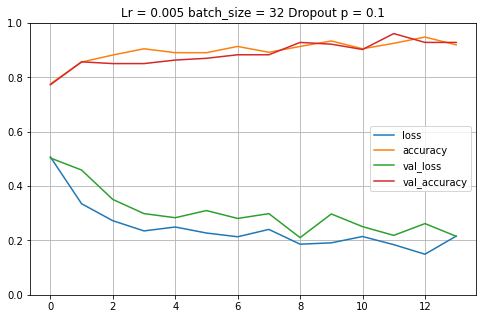

Lr = 0.005 batch_size = 32 Dropout p = 0.1
precision_score: 0.9204545454545454
recall_score: 0.8804347826086957
f1_score: 0.8999999999999999
accuracy_score: 0.8971428571428571
Epoch 13: early stopping


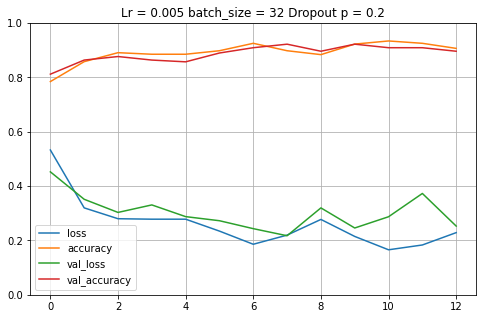

Lr = 0.005 batch_size = 32 Dropout p = 0.2
precision_score: 0.8829787234042553
recall_score: 0.9021739130434783
f1_score: 0.8924731182795699
accuracy_score: 0.8857142857142857
Epoch 16: early stopping


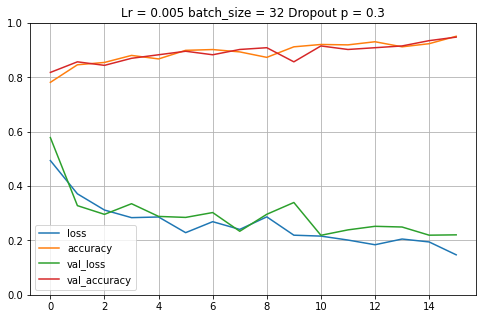

Lr = 0.005 batch_size = 32 Dropout p = 0.3
precision_score: 0.9642857142857143
recall_score: 0.8804347826086957
f1_score: 0.9204545454545455
accuracy_score: 0.92
Epoch 33: early stopping


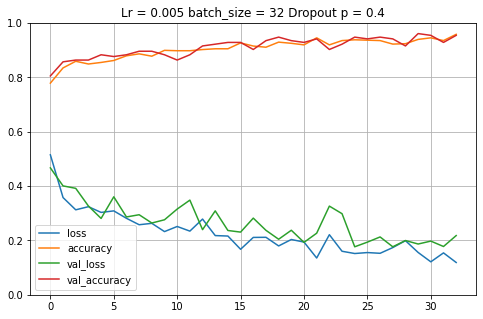

Lr = 0.005 batch_size = 32 Dropout p = 0.4
precision_score: 0.9655172413793104
recall_score: 0.9130434782608695
f1_score: 0.9385474860335196
accuracy_score: 0.9371428571428572
Epoch 19: early stopping


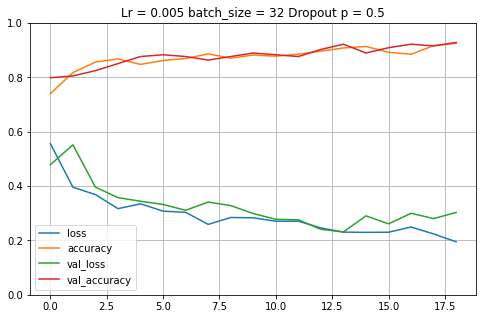

Lr = 0.005 batch_size = 32 Dropout p = 0.5
precision_score: 0.9431818181818182
recall_score: 0.9021739130434783
f1_score: 0.9222222222222224
accuracy_score: 0.92
Epoch 26: early stopping


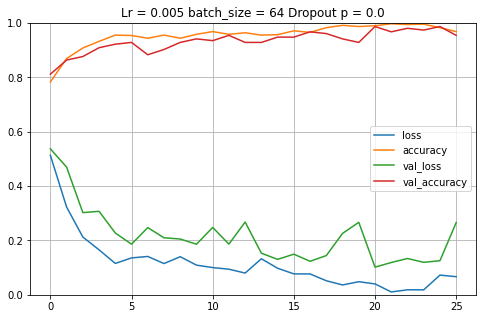

Lr = 0.005 batch_size = 64 Dropout p = 0.0
precision_score: 0.9651162790697675
recall_score: 0.9021739130434783
f1_score: 0.9325842696629213
accuracy_score: 0.9314285714285714
Epoch 16: early stopping


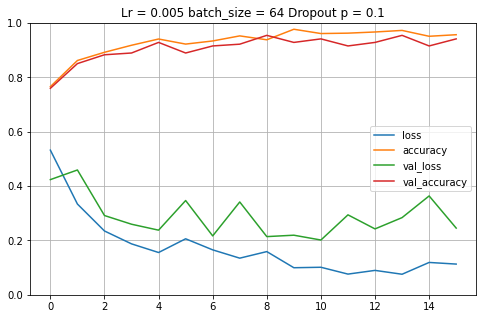

Lr = 0.005 batch_size = 64 Dropout p = 0.1
precision_score: 0.9545454545454546
recall_score: 0.9130434782608695
f1_score: 0.9333333333333332
accuracy_score: 0.9314285714285714
Epoch 20: early stopping


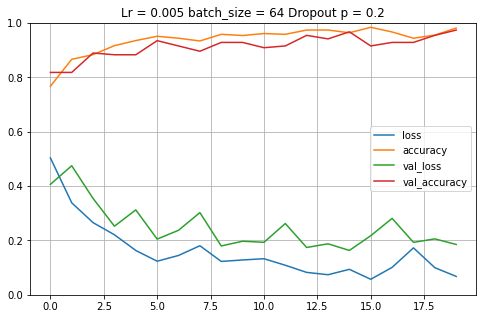

Lr = 0.005 batch_size = 64 Dropout p = 0.2
precision_score: 0.9583333333333334
recall_score: 1.0
f1_score: 0.9787234042553191
accuracy_score: 0.9771428571428571
Epoch 17: early stopping


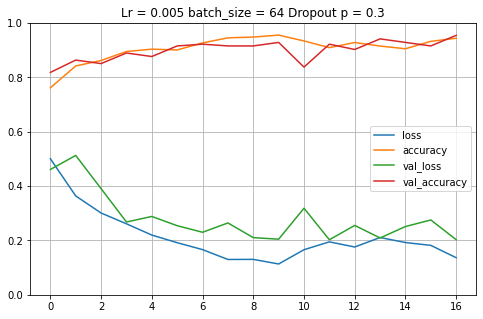

Lr = 0.005 batch_size = 64 Dropout p = 0.3
precision_score: 0.9560439560439561
recall_score: 0.9456521739130435
f1_score: 0.9508196721311475
accuracy_score: 0.9485714285714286
Epoch 32: early stopping


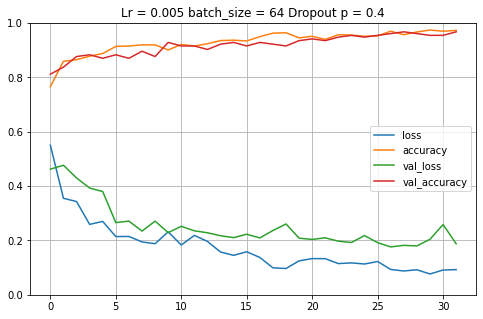

Lr = 0.005 batch_size = 64 Dropout p = 0.4
precision_score: 0.967032967032967
recall_score: 0.9565217391304348
f1_score: 0.9617486338797815
accuracy_score: 0.96
Epoch 25: early stopping


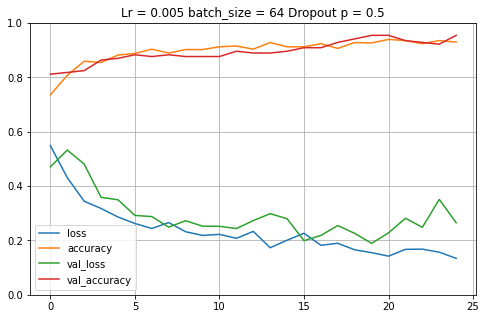

Lr = 0.005 batch_size = 64 Dropout p = 0.5
precision_score: 0.9052631578947369
recall_score: 0.9347826086956522
f1_score: 0.9197860962566845
accuracy_score: 0.9142857142857143
Epoch 28: early stopping


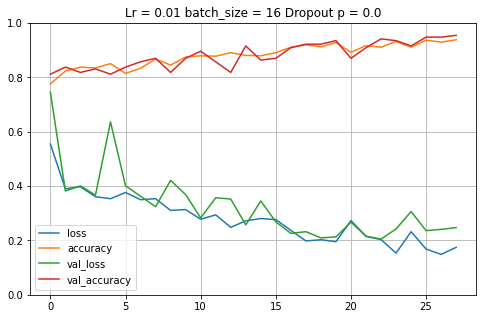

Lr = 0.01 batch_size = 16 Dropout p = 0.0
precision_score: 0.9444444444444444
recall_score: 0.9239130434782609
f1_score: 0.934065934065934
accuracy_score: 0.9314285714285714
Epoch 23: early stopping


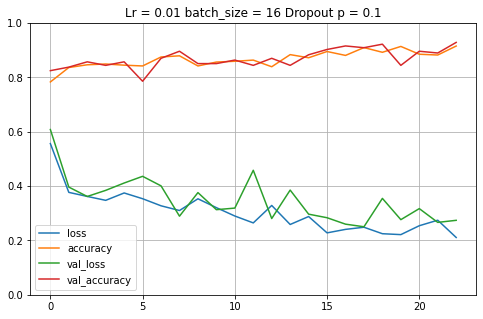

Lr = 0.01 batch_size = 16 Dropout p = 0.1
precision_score: 0.9431818181818182
recall_score: 0.9021739130434783
f1_score: 0.9222222222222224
accuracy_score: 0.92
Epoch 11: early stopping


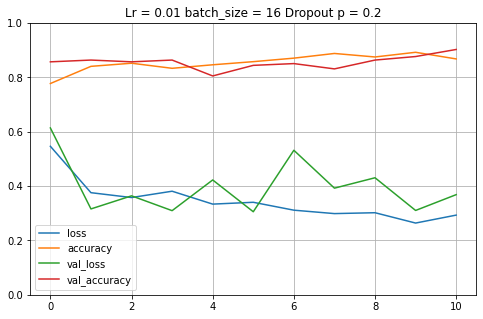

Lr = 0.01 batch_size = 16 Dropout p = 0.2
precision_score: 0.9080459770114943
recall_score: 0.8586956521739131
f1_score: 0.88268156424581
accuracy_score: 0.88
Epoch 12: early stopping


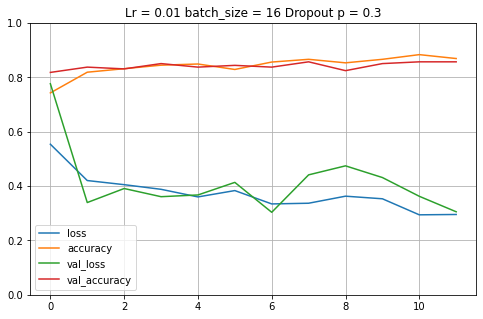

Lr = 0.01 batch_size = 16 Dropout p = 0.3
precision_score: 0.8018867924528302
recall_score: 0.9239130434782609
f1_score: 0.8585858585858587
accuracy_score: 0.84
Epoch 19: early stopping


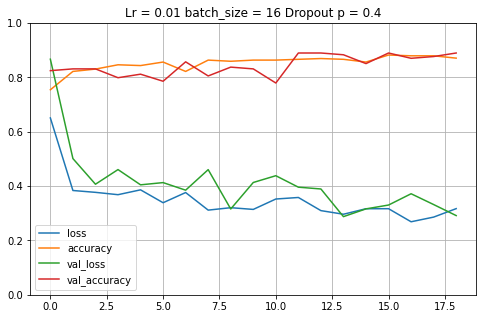

Lr = 0.01 batch_size = 16 Dropout p = 0.4
precision_score: 0.8953488372093024
recall_score: 0.8369565217391305
f1_score: 0.8651685393258426
accuracy_score: 0.8628571428571429
Epoch 17: early stopping


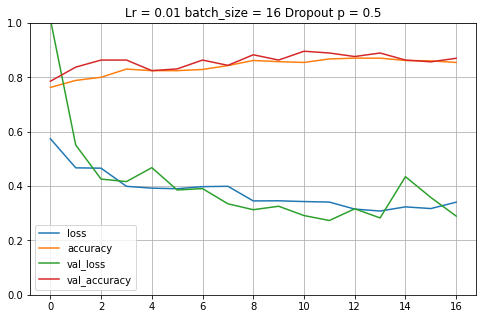

Lr = 0.01 batch_size = 16 Dropout p = 0.5
precision_score: 0.8709677419354839
recall_score: 0.8804347826086957
f1_score: 0.8756756756756756
accuracy_score: 0.8685714285714285
Epoch 14: early stopping


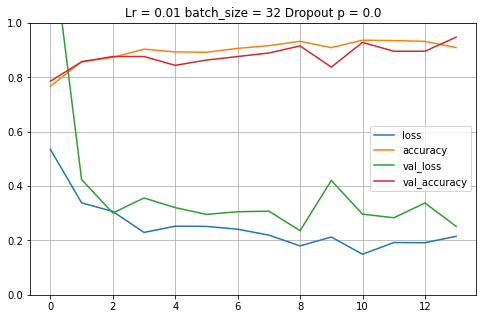

Lr = 0.01 batch_size = 32 Dropout p = 0.0
precision_score: 0.9518072289156626
recall_score: 0.8586956521739131
f1_score: 0.9028571428571429
accuracy_score: 0.9028571428571428
Epoch 13: early stopping


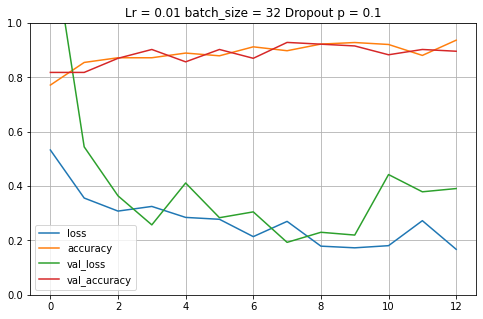

Lr = 0.01 batch_size = 32 Dropout p = 0.1
precision_score: 0.9120879120879121
recall_score: 0.9021739130434783
f1_score: 0.907103825136612
accuracy_score: 0.9028571428571428
Epoch 10: early stopping


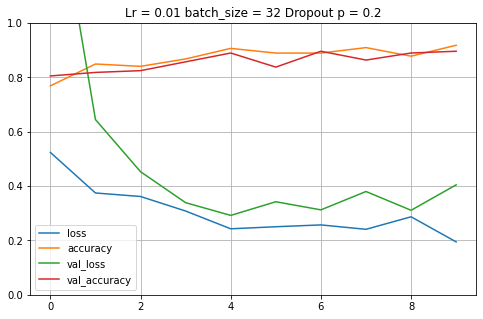

Lr = 0.01 batch_size = 32 Dropout p = 0.2
precision_score: 0.9021739130434783
recall_score: 0.9021739130434783
f1_score: 0.9021739130434784
accuracy_score: 0.8971428571428571
Epoch 16: early stopping


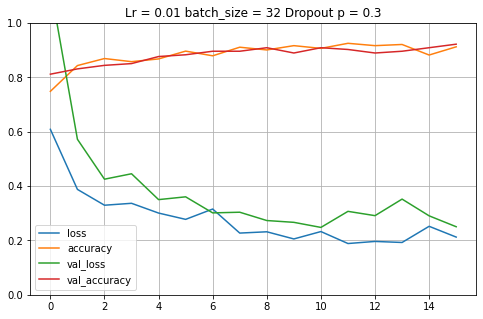

Lr = 0.01 batch_size = 32 Dropout p = 0.3
precision_score: 0.927710843373494
recall_score: 0.8369565217391305
f1_score: 0.8800000000000001
accuracy_score: 0.88
Epoch 12: early stopping


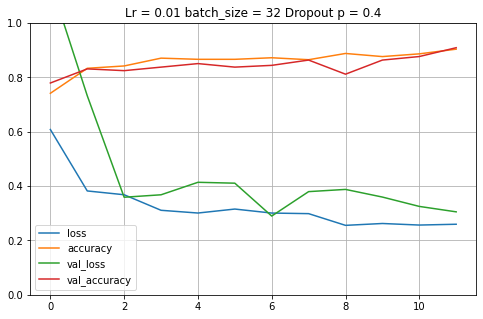

Lr = 0.01 batch_size = 32 Dropout p = 0.4
precision_score: 0.865979381443299
recall_score: 0.9130434782608695
f1_score: 0.8888888888888888
accuracy_score: 0.88
Epoch 13: early stopping


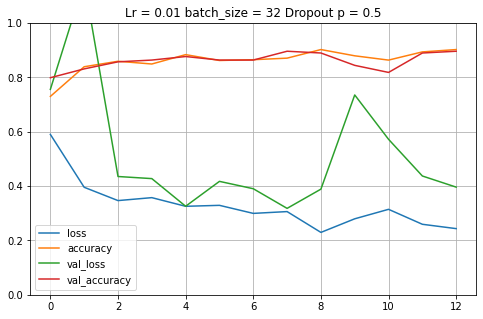

Lr = 0.01 batch_size = 32 Dropout p = 0.5
precision_score: 0.8333333333333334
recall_score: 0.9239130434782609
f1_score: 0.8762886597938144
accuracy_score: 0.8628571428571429
Epoch 16: early stopping


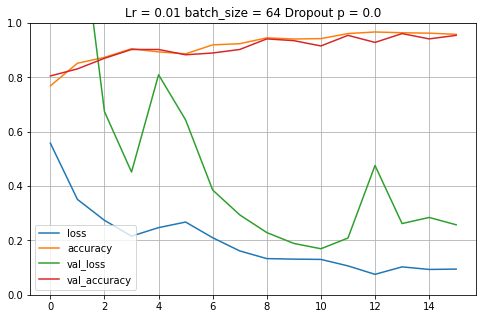

Lr = 0.01 batch_size = 64 Dropout p = 0.0
precision_score: 0.9397590361445783
recall_score: 0.8478260869565217
f1_score: 0.8914285714285715
accuracy_score: 0.8914285714285715
Epoch 23: early stopping


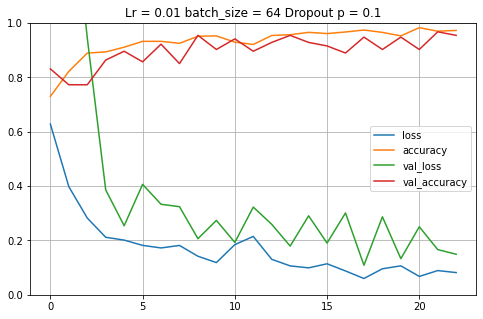

Lr = 0.01 batch_size = 64 Dropout p = 0.1
precision_score: 0.9772727272727273
recall_score: 0.9347826086956522
f1_score: 0.9555555555555557
accuracy_score: 0.9542857142857143
Epoch 14: early stopping


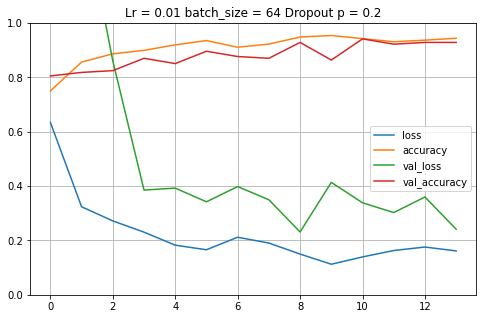

Lr = 0.01 batch_size = 64 Dropout p = 0.2
precision_score: 0.9662921348314607
recall_score: 0.9347826086956522
f1_score: 0.9502762430939227
accuracy_score: 0.9485714285714286
Epoch 21: early stopping


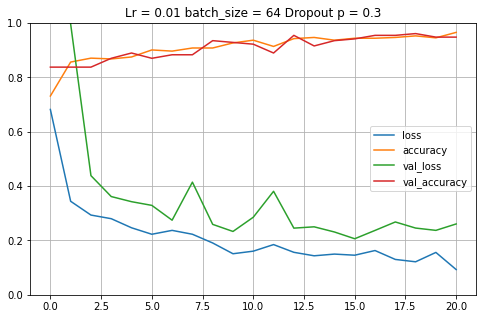

Lr = 0.01 batch_size = 64 Dropout p = 0.3
precision_score: 0.9655172413793104
recall_score: 0.9130434782608695
f1_score: 0.9385474860335196
accuracy_score: 0.9371428571428572
Epoch 21: early stopping


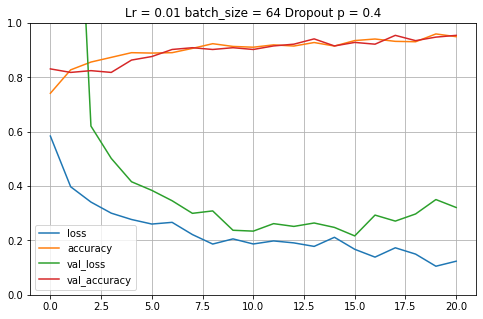

Lr = 0.01 batch_size = 64 Dropout p = 0.4
precision_score: 0.9540229885057471
recall_score: 0.9021739130434783
f1_score: 0.9273743016759777
accuracy_score: 0.9257142857142857
Epoch 13: early stopping


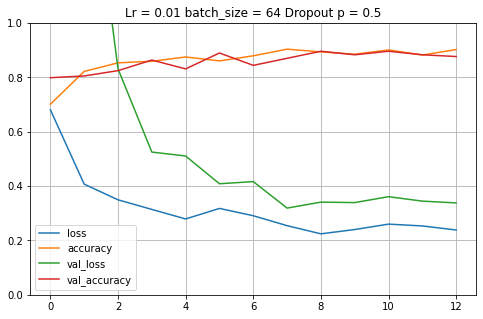

Lr = 0.01 batch_size = 64 Dropout p = 0.5
precision_score: 0.8673469387755102
recall_score: 0.9239130434782609
f1_score: 0.8947368421052632
accuracy_score: 0.8857142857142857


In [379]:
from sklearn import  metrics

best_acc = (None, 0, 0, 0, 0)
best_recall = (None, 0, 0, 0, 0)

for lr in lr_list:
    for bs in batch_size_list:
        for p in dropout_p:
          if p: 
            model = keras.Sequential([               
                Dense(1024,input_shape=[X_train.shape[1]]),
                BatchNormalization(),
                Activation('relu'),
                Dropout(p),
                Dense(512),
                BatchNormalization(),
                Activation('relu'),
                Dropout(p),
                Dense(512),
                BatchNormalization(),
                Activation('relu'),
                Dropout(p),
                Dense(256),
                BatchNormalization(),
                Activation('relu'),
                Dropout(p),
                Dense(128, activation='relu'),
                Dense(1, activation='sigmoid'),
            ])
            history = History()
            Adam = keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, amsgrad=False)
            model.compile(loss="binary_crossentropy", optimizer=Adam, metrics=["accuracy"]) #tf.keras.metrics.Recall()
            history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=bs, epochs=epochs, callbacks=[early_stopping], verbose=0)
            pd.DataFrame(history.history).plot(figsize=(8, 5))
            plt.grid(True)
            plt.gca().set_ylim(0, 1)
            plt.title('Lr = '+str(lr)+' batch_size = '+str(bs) + ' Dropout p = '+str(p))
            plt.show()
            y_pred = (model.predict(X_val)>0.5)
            print('Lr = '+str(lr)+' batch_size = '+str(bs) + ' Dropout p = '+str(p))
            print("precision_score: {}".format(metrics.precision_score(y_val, y_pred )))
            print("recall_score: {}".format( metrics.recall_score(y_val, y_pred )))
            print("f1_score: {}".format( metrics.f1_score(y_val, y_pred)))
            print("accuracy_score: {}".format( metrics.accuracy_score(y_val, y_pred)))
            if metrics.recall_score(y_val, y_pred) >= best_recall[1]:
                best_recall = (model, metrics.recall_score(y_val, y_pred), lr, bs, p)
            if metrics.accuracy_score(y_val, y_pred) >= best_acc[1]:
                best_acc = (model, metrics.accuracy_score(y_val, y_pred), lr, bs, p)
          else:
            model = keras.Sequential([             
                Dense(1024, input_shape=[X_train.shape[1]]),
                BatchNormalization(),
                Activation('relu'),
                Dense(512),
                BatchNormalization(),
                Activation('relu'),
                Dense(512),
                BatchNormalization(),
                Activation('relu'),
                Dense(256),
                BatchNormalization(),
                Activation('relu'),
                Dense(128, activation='relu'),
                Dense(1, activation='sigmoid'),
            ])
            history = History()
            Adam = keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, amsgrad=False)
            model.compile(loss="binary_crossentropy", optimizer=Adam, metrics=["accuracy"]) #tf.keras.metrics.Recall()
            history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=bs, epochs=epochs, callbacks=[early_stopping], verbose=0)
            pd.DataFrame(history.history).plot(figsize=(8, 5))
            plt.grid(True)
            plt.gca().set_ylim(0, 1)
            plt.title('Lr = '+str(lr)+' batch_size = '+str(bs) + ' Dropout p = '+str(p))
            plt.show()
            y_pred = (model.predict(X_val)>0.5)
            print('Lr = '+str(lr)+' batch_size = '+str(bs) + ' Dropout p = '+str(p))
            print("precision_score: {}".format(metrics.precision_score(y_val, y_pred )))
            print("recall_score: {}".format( metrics.recall_score(y_val, y_pred )))
            print("f1_score: {}".format( metrics.f1_score(y_val, y_pred)))
            print("accuracy_score: {}".format( metrics.accuracy_score(y_val, y_pred)))
            if metrics.recall_score(y_val, y_pred) >= best_recall[1]:
                best_recall = (model, metrics.recall_score(y_val, y_pred), lr, bs, p)
            if metrics.accuracy_score(y_val, y_pred) >= best_acc[1]:
                best_acc = (model, metrics.accuracy_score(y_val, y_pred), lr, bs, p)
        

In [288]:
initializer = tf.keras.initializers.HeNormal()
model_HE_init = keras.Sequential([             
    Dense(1024,input_shape=[X_train.shape[1]], kernel_initializer=initializer),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    Dense(512, kernel_initializer=initializer),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    Dense(512, kernel_initializer=initializer),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    Dense(256, kernel_initializer=initializer),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.2),
    Dense(128, activation='relu', kernel_initializer=initializer),
    Dense(1, activation='sigmoid'),
])

model_HE_init.summary()

Model: "sequential_679"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4074 (Dense)          (None, 1024)              13312     
                                                                 
 batch_normalization_2634 (B  (None, 1024)             4096      
 atchNormalization)                                              
                                                                 
 activation_2628 (Activation  (None, 1024)             0         
 )                                                               
                                                                 
 dropout_2219 (Dropout)      (None, 1024)              0         
                                                                 
 dense_4075 (Dense)          (None, 512)               524800    
                                                                 
 batch_normalization_2635 (B  (None, 512)           

Epoch 29: early stopping


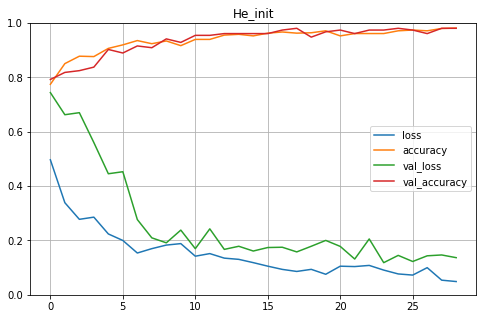

In [289]:
model_HE_init.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"]) #tf.keras.metrics.Recall()
history = model_HE_init.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32, epochs=100, callbacks=[early_stopping], verbose=0)
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.title('He_init')
plt.show()

Epoch 18: early stopping


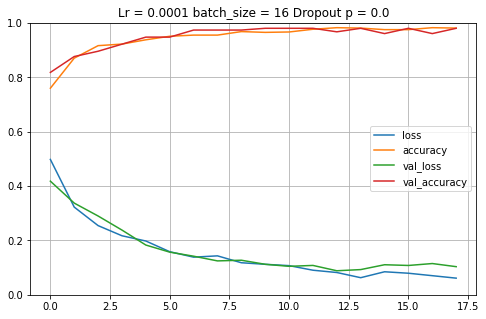

Lr = 0.0001 batch_size = 16 Dropout p = 0.0
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 28: early stopping


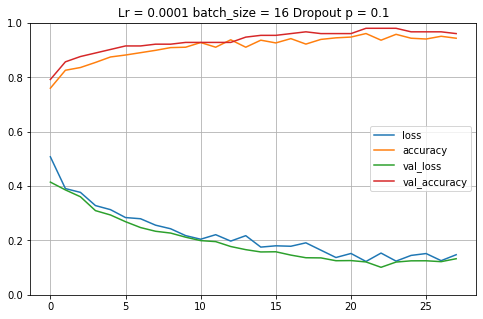

Lr = 0.0001 batch_size = 16 Dropout p = 0.1
precision_score: 0.967391304347826
recall_score: 0.967391304347826
f1_score: 0.967391304347826
accuracy_score: 0.9657142857142857
Epoch 40: early stopping


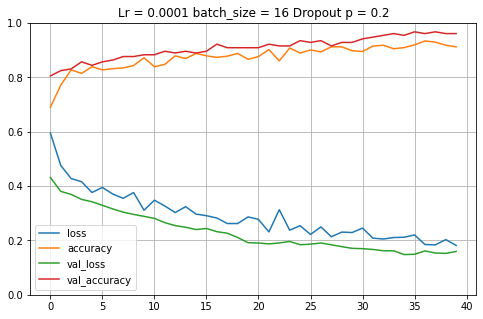

Lr = 0.0001 batch_size = 16 Dropout p = 0.2
precision_score: 0.9666666666666667
recall_score: 0.9456521739130435
f1_score: 0.956043956043956
accuracy_score: 0.9542857142857143
Epoch 75: early stopping


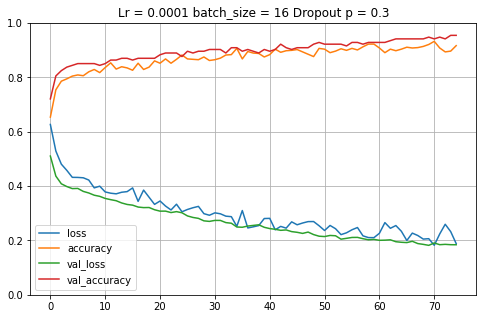

Lr = 0.0001 batch_size = 16 Dropout p = 0.3
precision_score: 0.9555555555555556
recall_score: 0.9347826086956522
f1_score: 0.945054945054945
accuracy_score: 0.9428571428571428
Epoch 87: early stopping


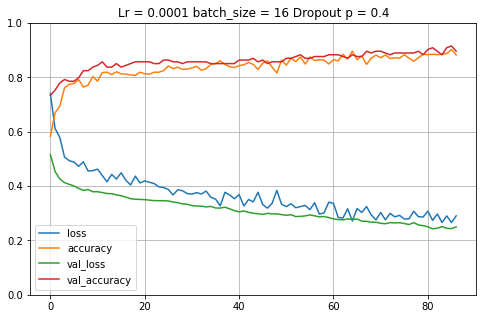

Lr = 0.0001 batch_size = 16 Dropout p = 0.4
precision_score: 0.9213483146067416
recall_score: 0.8913043478260869
f1_score: 0.9060773480662982
accuracy_score: 0.9028571428571428
Epoch 70: early stopping


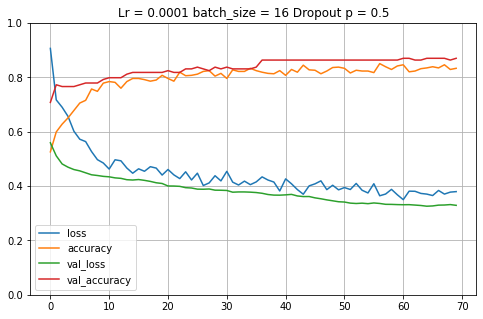

Lr = 0.0001 batch_size = 16 Dropout p = 0.5
precision_score: 0.8125
recall_score: 0.8478260869565217
f1_score: 0.8297872340425533
accuracy_score: 0.8171428571428572
Epoch 18: early stopping


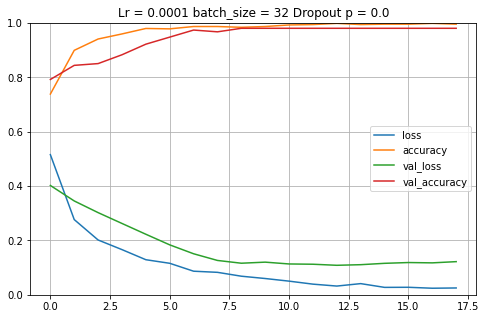

Lr = 0.0001 batch_size = 32 Dropout p = 0.0
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 32: early stopping


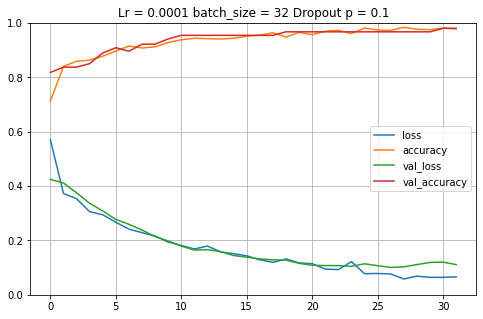

Lr = 0.0001 batch_size = 32 Dropout p = 0.1
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 40: early stopping


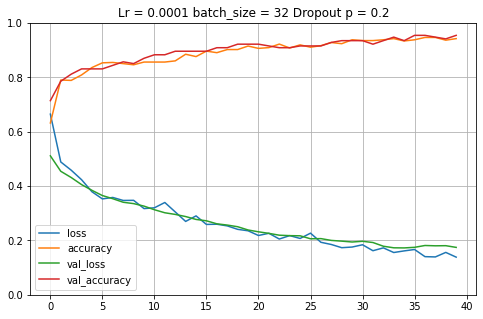

Lr = 0.0001 batch_size = 32 Dropout p = 0.2
precision_score: 0.9560439560439561
recall_score: 0.9456521739130435
f1_score: 0.9508196721311475
accuracy_score: 0.9485714285714286
Epoch 84: early stopping


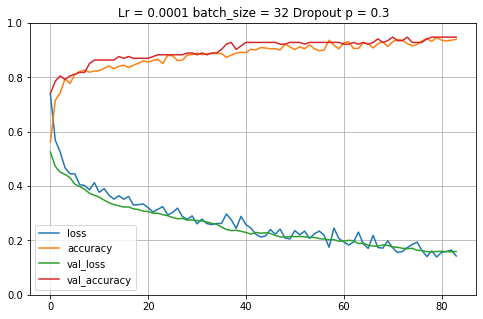

Lr = 0.0001 batch_size = 32 Dropout p = 0.3
precision_score: 0.9555555555555556
recall_score: 0.9347826086956522
f1_score: 0.945054945054945
accuracy_score: 0.9428571428571428
Epoch 60: early stopping


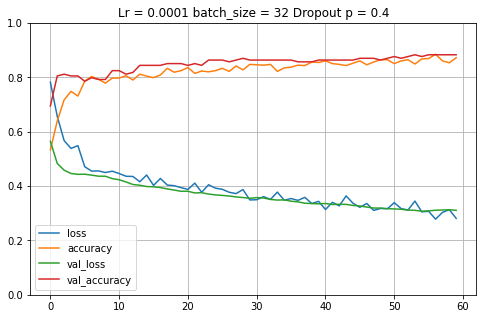

Lr = 0.0001 batch_size = 32 Dropout p = 0.4
precision_score: 0.8571428571428571
recall_score: 0.8478260869565217
f1_score: 0.8524590163934426
accuracy_score: 0.8457142857142858


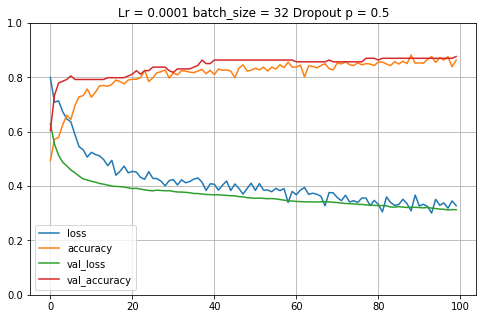

Lr = 0.0001 batch_size = 32 Dropout p = 0.5
precision_score: 0.8809523809523809
recall_score: 0.8043478260869565
f1_score: 0.8409090909090908
accuracy_score: 0.84
Epoch 27: early stopping


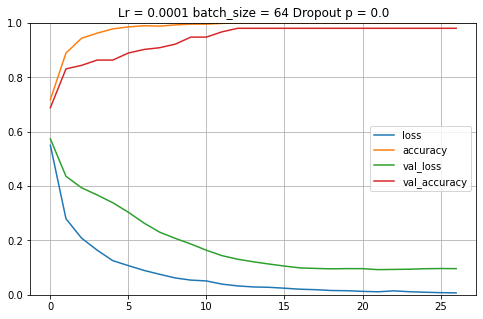

Lr = 0.0001 batch_size = 64 Dropout p = 0.0
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 31: early stopping


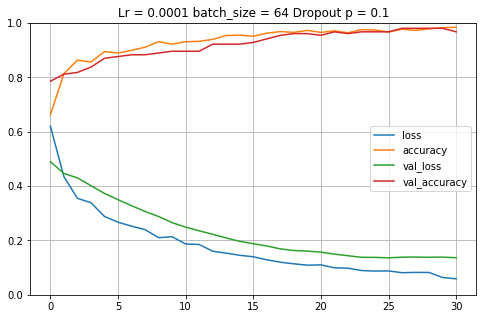

Lr = 0.0001 batch_size = 64 Dropout p = 0.1
precision_score: 0.967741935483871
recall_score: 0.9782608695652174
f1_score: 0.972972972972973
accuracy_score: 0.9714285714285714
Epoch 66: early stopping


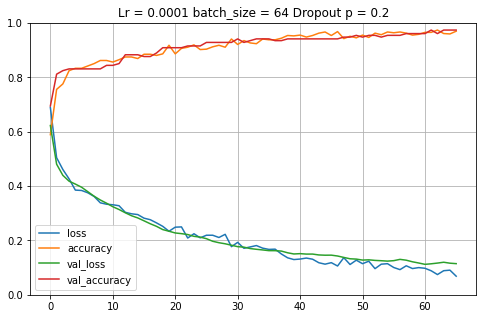

Lr = 0.0001 batch_size = 64 Dropout p = 0.2
precision_score: 0.967391304347826
recall_score: 0.967391304347826
f1_score: 0.967391304347826
accuracy_score: 0.9657142857142857
Epoch 92: early stopping


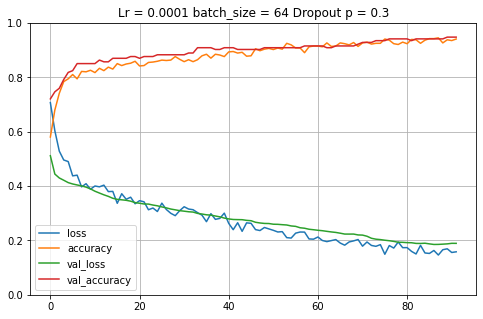

Lr = 0.0001 batch_size = 64 Dropout p = 0.3
precision_score: 0.9651162790697675
recall_score: 0.9021739130434783
f1_score: 0.9325842696629213
accuracy_score: 0.9314285714285714


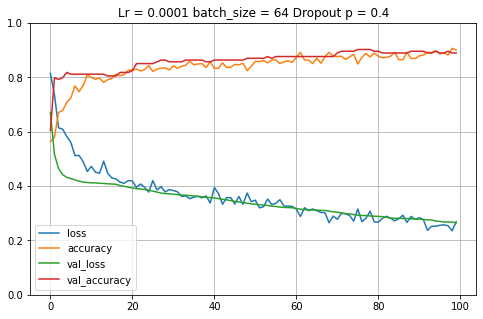

Lr = 0.0001 batch_size = 64 Dropout p = 0.4
precision_score: 0.9166666666666666
recall_score: 0.8369565217391305
f1_score: 0.875
accuracy_score: 0.8742857142857143
Epoch 18: early stopping


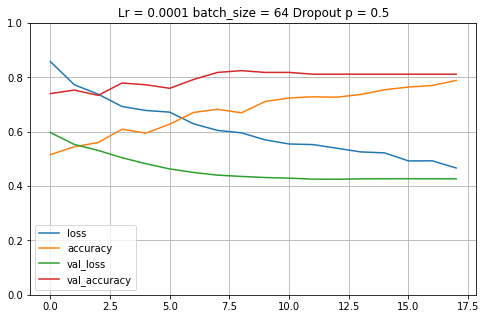

Lr = 0.0001 batch_size = 64 Dropout p = 0.5
precision_score: 0.7714285714285715
recall_score: 0.8804347826086957
f1_score: 0.8223350253807107
accuracy_score: 0.8
Epoch 19: early stopping


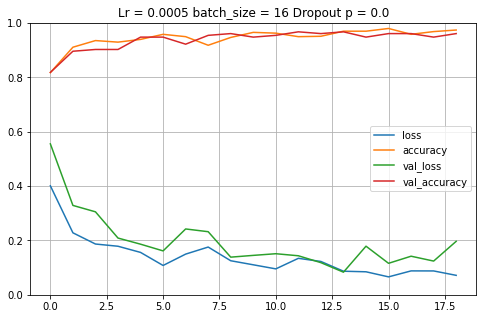

Lr = 0.0005 batch_size = 16 Dropout p = 0.0
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 17: early stopping


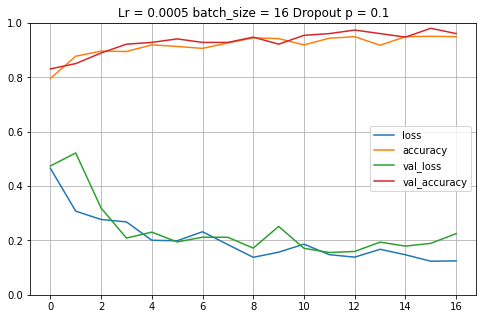

Lr = 0.0005 batch_size = 16 Dropout p = 0.1
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 15: early stopping


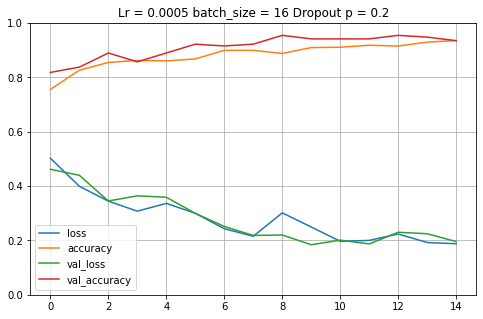

Lr = 0.0005 batch_size = 16 Dropout p = 0.2
precision_score: 0.9333333333333333
recall_score: 0.9130434782608695
f1_score: 0.9230769230769231
accuracy_score: 0.92
Epoch 55: early stopping


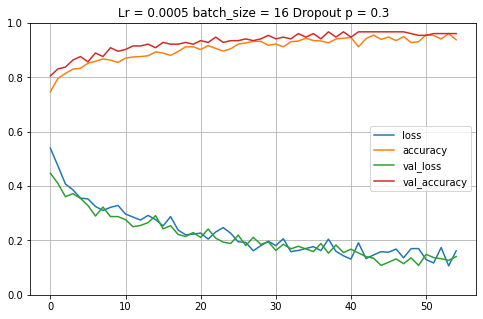

Lr = 0.0005 batch_size = 16 Dropout p = 0.3
precision_score: 0.9565217391304348
recall_score: 0.9565217391304348
f1_score: 0.9565217391304348
accuracy_score: 0.9542857142857143
Epoch 30: early stopping


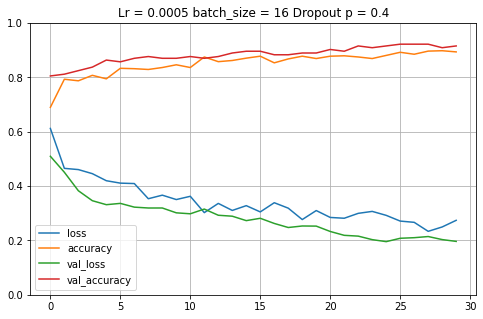

Lr = 0.0005 batch_size = 16 Dropout p = 0.4
precision_score: 0.9529411764705882
recall_score: 0.8804347826086957
f1_score: 0.9152542372881357
accuracy_score: 0.9142857142857143
Epoch 36: early stopping


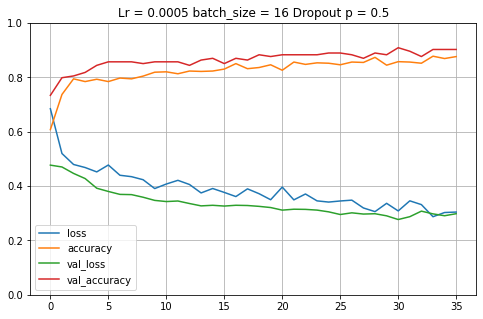

Lr = 0.0005 batch_size = 16 Dropout p = 0.5
precision_score: 0.9010989010989011
recall_score: 0.8913043478260869
f1_score: 0.8961748633879782
accuracy_score: 0.8914285714285715
Epoch 17: early stopping


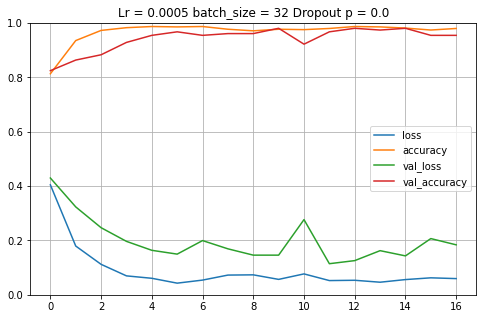

Lr = 0.0005 batch_size = 32 Dropout p = 0.0
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 17: early stopping


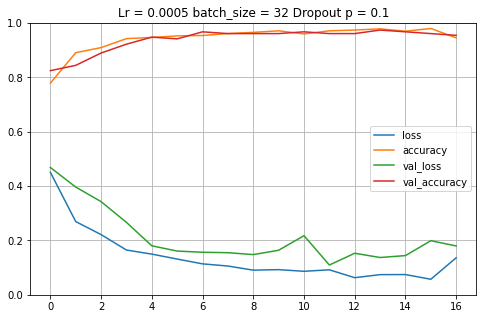

Lr = 0.0005 batch_size = 32 Dropout p = 0.1
precision_score: 0.967741935483871
recall_score: 0.9782608695652174
f1_score: 0.972972972972973
accuracy_score: 0.9714285714285714
Epoch 27: early stopping


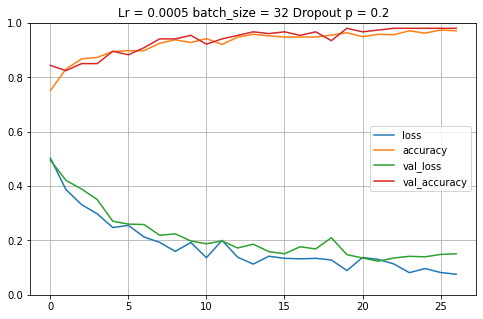

Lr = 0.0005 batch_size = 32 Dropout p = 0.2
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 28: early stopping


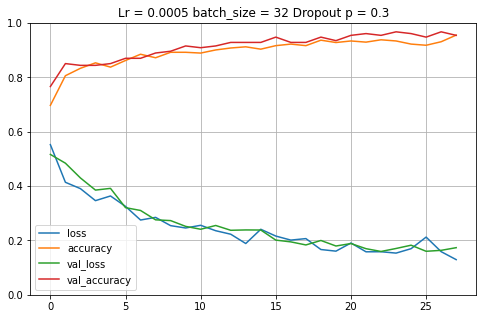

Lr = 0.0005 batch_size = 32 Dropout p = 0.3
precision_score: 0.9659090909090909
recall_score: 0.9239130434782609
f1_score: 0.9444444444444444
accuracy_score: 0.9428571428571428
Epoch 32: early stopping


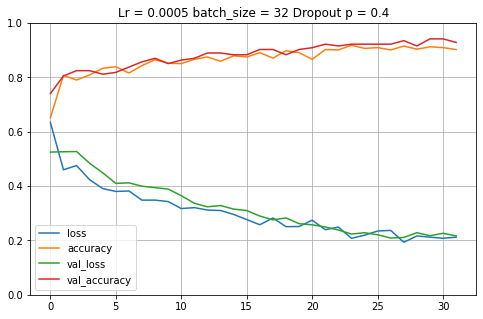

Lr = 0.0005 batch_size = 32 Dropout p = 0.4
precision_score: 0.9130434782608695
recall_score: 0.9130434782608695
f1_score: 0.9130434782608695
accuracy_score: 0.9085714285714286
Epoch 22: early stopping


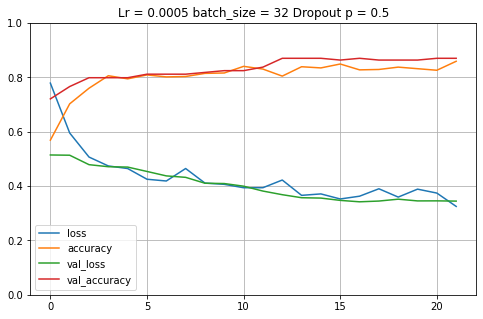

Lr = 0.0005 batch_size = 32 Dropout p = 0.5
precision_score: 0.8279569892473119
recall_score: 0.8369565217391305
f1_score: 0.8324324324324325
accuracy_score: 0.8228571428571428
Epoch 15: early stopping


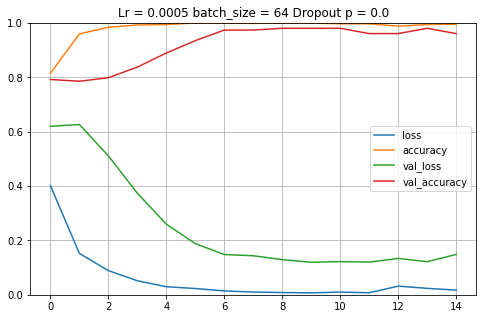

Lr = 0.0005 batch_size = 64 Dropout p = 0.0
precision_score: 0.978021978021978
recall_score: 0.967391304347826
f1_score: 0.9726775956284153
accuracy_score: 0.9714285714285714
Epoch 16: early stopping


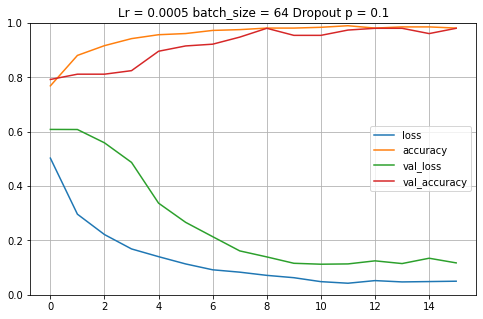

Lr = 0.0005 batch_size = 64 Dropout p = 0.1
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 22: early stopping


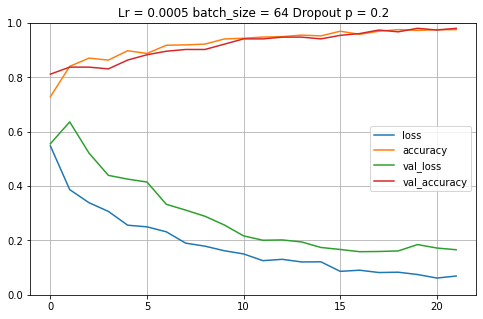

Lr = 0.0005 batch_size = 64 Dropout p = 0.2
precision_score: 0.978021978021978
recall_score: 0.967391304347826
f1_score: 0.9726775956284153
accuracy_score: 0.9714285714285714
Epoch 45: early stopping


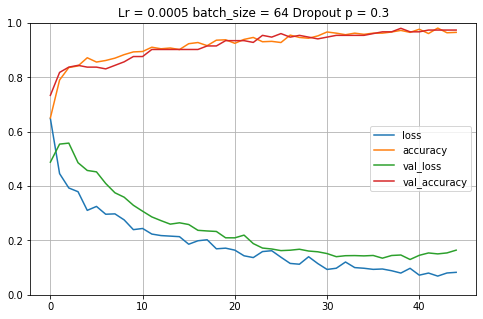

Lr = 0.0005 batch_size = 64 Dropout p = 0.3
precision_score: 0.978021978021978
recall_score: 0.967391304347826
f1_score: 0.9726775956284153
accuracy_score: 0.9714285714285714
Epoch 6: early stopping


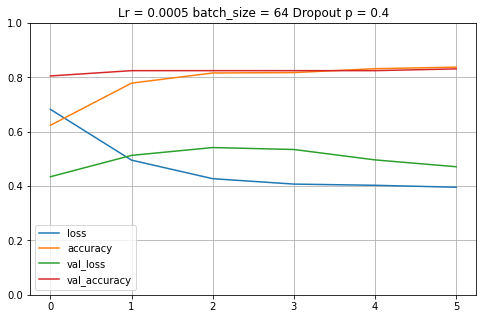

Lr = 0.0005 batch_size = 64 Dropout p = 0.4
precision_score: 0.801980198019802
recall_score: 0.8804347826086957
f1_score: 0.839378238341969
accuracy_score: 0.8228571428571428
Epoch 7: early stopping


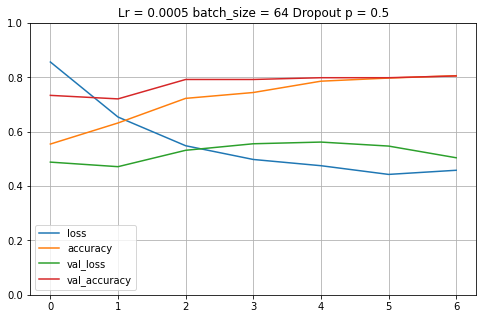

Lr = 0.0005 batch_size = 64 Dropout p = 0.5
precision_score: 0.7766990291262136
recall_score: 0.8695652173913043
f1_score: 0.8205128205128205
accuracy_score: 0.8
Epoch 14: early stopping


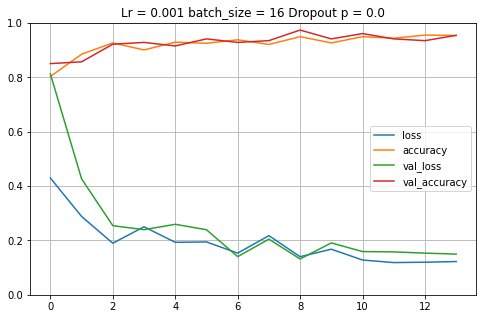

Lr = 0.001 batch_size = 16 Dropout p = 0.0
precision_score: 0.92
recall_score: 1.0
f1_score: 0.9583333333333334
accuracy_score: 0.9542857142857143
Epoch 16: early stopping


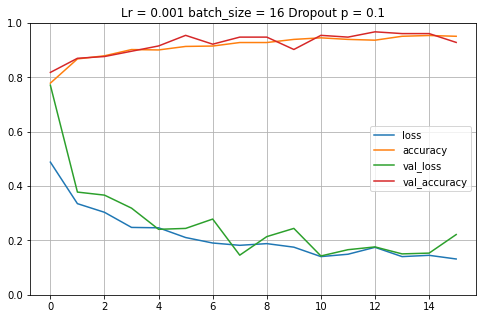

Lr = 0.001 batch_size = 16 Dropout p = 0.1
precision_score: 0.9662921348314607
recall_score: 0.9347826086956522
f1_score: 0.9502762430939227
accuracy_score: 0.9485714285714286
Epoch 11: early stopping


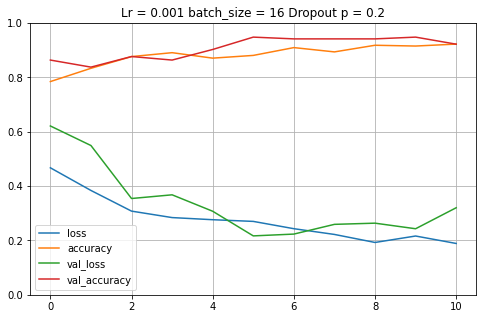

Lr = 0.001 batch_size = 16 Dropout p = 0.2
precision_score: 0.9239130434782609
recall_score: 0.9239130434782609
f1_score: 0.9239130434782609
accuracy_score: 0.92
Epoch 28: early stopping


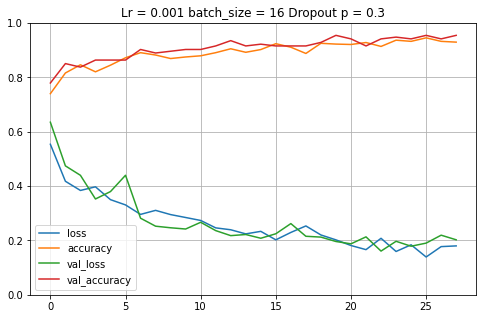

Lr = 0.001 batch_size = 16 Dropout p = 0.3
precision_score: 0.9555555555555556
recall_score: 0.9347826086956522
f1_score: 0.945054945054945
accuracy_score: 0.9428571428571428
Epoch 18: early stopping


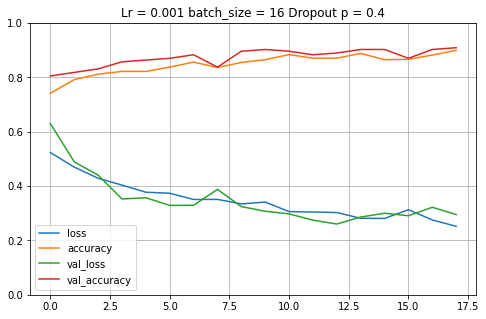

Lr = 0.001 batch_size = 16 Dropout p = 0.4
precision_score: 0.9111111111111111
recall_score: 0.8913043478260869
f1_score: 0.9010989010989011
accuracy_score: 0.8971428571428571
Epoch 17: early stopping


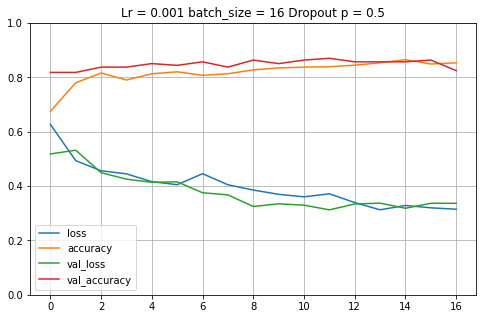

Lr = 0.001 batch_size = 16 Dropout p = 0.5
precision_score: 0.82
recall_score: 0.8913043478260869
f1_score: 0.8541666666666666
accuracy_score: 0.84
Epoch 15: early stopping


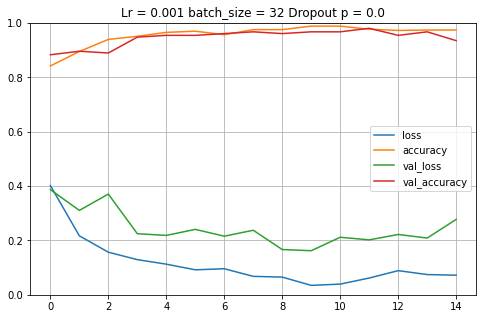

Lr = 0.001 batch_size = 32 Dropout p = 0.0
precision_score: 0.9375
recall_score: 0.9782608695652174
f1_score: 0.9574468085106383
accuracy_score: 0.9542857142857143
Epoch 22: early stopping


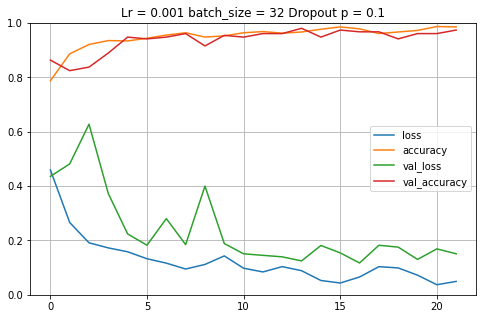

Lr = 0.001 batch_size = 32 Dropout p = 0.1
precision_score: 0.9777777777777777
recall_score: 0.9565217391304348
f1_score: 0.967032967032967
accuracy_score: 0.9657142857142857
Epoch 26: early stopping


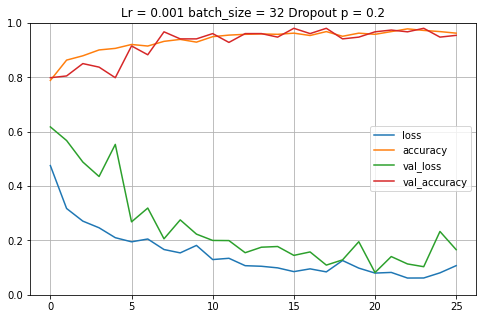

Lr = 0.001 batch_size = 32 Dropout p = 0.2
precision_score: 0.967391304347826
recall_score: 0.967391304347826
f1_score: 0.967391304347826
accuracy_score: 0.9657142857142857
Epoch 26: early stopping


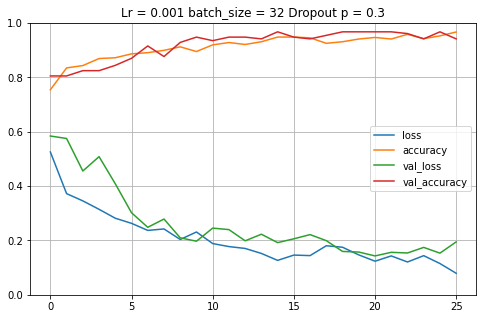

Lr = 0.001 batch_size = 32 Dropout p = 0.3
precision_score: 0.9270833333333334
recall_score: 0.967391304347826
f1_score: 0.9468085106382979
accuracy_score: 0.9428571428571428
Epoch 22: early stopping


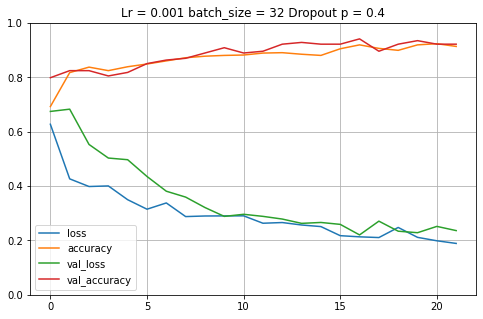

Lr = 0.001 batch_size = 32 Dropout p = 0.4
precision_score: 0.9230769230769231
recall_score: 0.9130434782608695
f1_score: 0.9180327868852459
accuracy_score: 0.9142857142857143
Epoch 38: early stopping


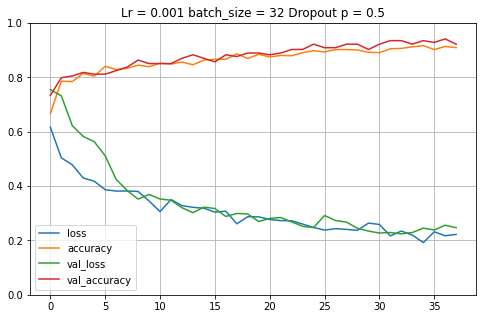

Lr = 0.001 batch_size = 32 Dropout p = 0.5
precision_score: 0.9230769230769231
recall_score: 0.9130434782608695
f1_score: 0.9180327868852459
accuracy_score: 0.9142857142857143
Epoch 20: early stopping


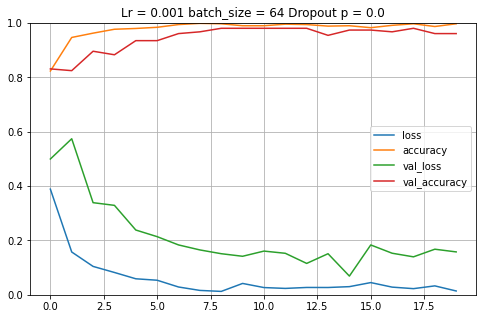

Lr = 0.001 batch_size = 64 Dropout p = 0.0
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 16: early stopping


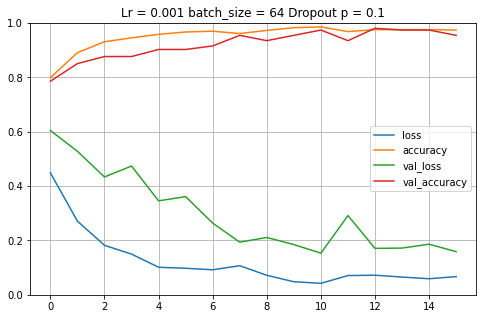

Lr = 0.001 batch_size = 64 Dropout p = 0.1
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 28: early stopping


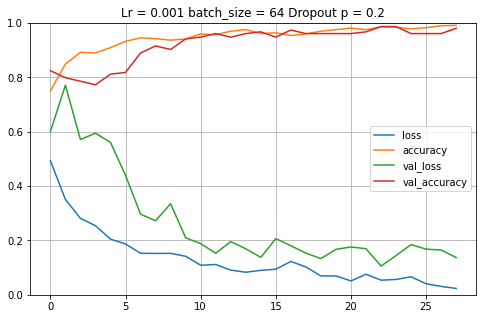

Lr = 0.001 batch_size = 64 Dropout p = 0.2
precision_score: 0.9782608695652174
recall_score: 0.9782608695652174
f1_score: 0.9782608695652174
accuracy_score: 0.9771428571428571
Epoch 22: early stopping


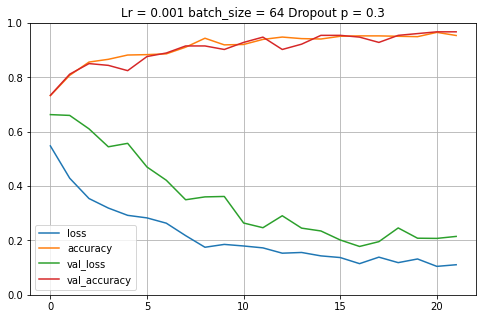

Lr = 0.001 batch_size = 64 Dropout p = 0.3
precision_score: 0.9574468085106383
recall_score: 0.9782608695652174
f1_score: 0.967741935483871
accuracy_score: 0.9657142857142857
Epoch 29: early stopping


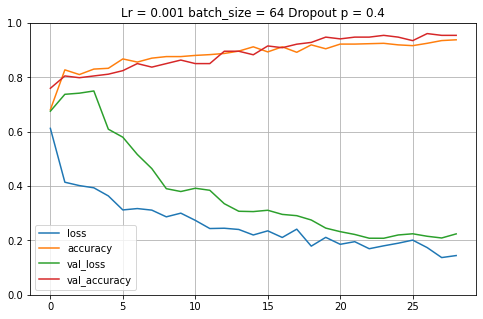

Lr = 0.001 batch_size = 64 Dropout p = 0.4
precision_score: 0.9545454545454546
recall_score: 0.9130434782608695
f1_score: 0.9333333333333332
accuracy_score: 0.9314285714285714
Epoch 6: early stopping


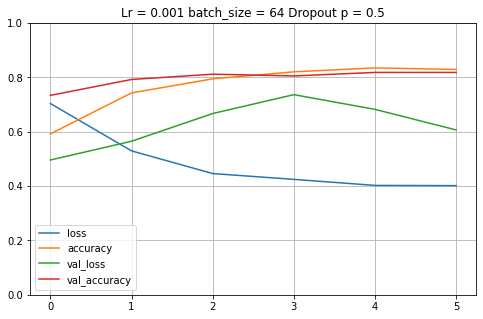

Lr = 0.001 batch_size = 64 Dropout p = 0.5
precision_score: 0.7714285714285715
recall_score: 0.8804347826086957
f1_score: 0.8223350253807107
accuracy_score: 0.8
Epoch 19: early stopping


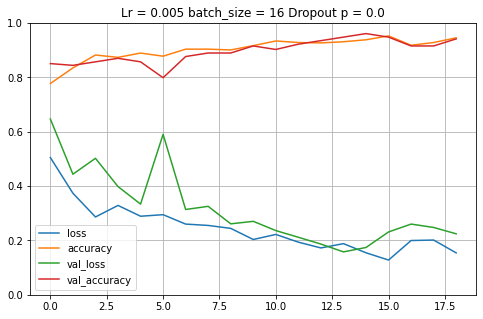

Lr = 0.005 batch_size = 16 Dropout p = 0.0
precision_score: 0.9555555555555556
recall_score: 0.9347826086956522
f1_score: 0.945054945054945
accuracy_score: 0.9428571428571428
Epoch 25: early stopping


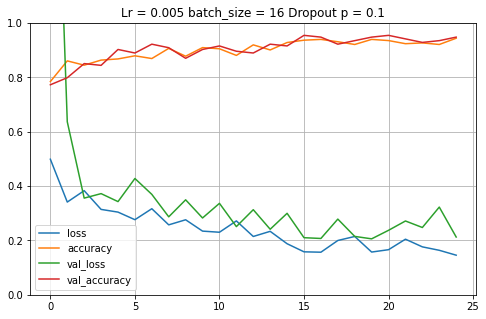

Lr = 0.005 batch_size = 16 Dropout p = 0.1
precision_score: 0.9651162790697675
recall_score: 0.9021739130434783
f1_score: 0.9325842696629213
accuracy_score: 0.9314285714285714
Epoch 23: early stopping


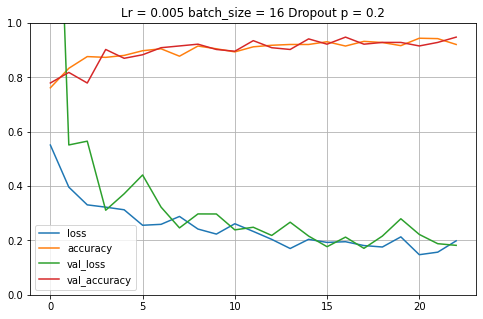

Lr = 0.005 batch_size = 16 Dropout p = 0.2
precision_score: 0.9456521739130435
recall_score: 0.9456521739130435
f1_score: 0.9456521739130435
accuracy_score: 0.9428571428571428
Epoch 24: early stopping


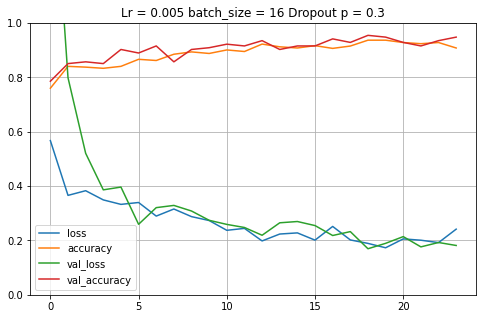

Lr = 0.005 batch_size = 16 Dropout p = 0.3
precision_score: 0.9534883720930233
recall_score: 0.8913043478260869
f1_score: 0.9213483146067417
accuracy_score: 0.92
Epoch 23: early stopping


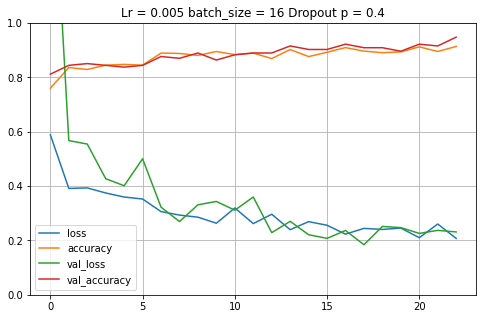

Lr = 0.005 batch_size = 16 Dropout p = 0.4
precision_score: 0.9534883720930233
recall_score: 0.8913043478260869
f1_score: 0.9213483146067417
accuracy_score: 0.92
Epoch 18: early stopping


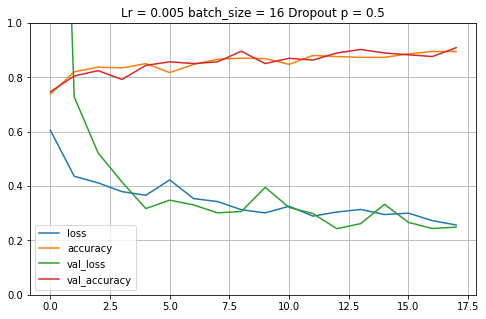

Lr = 0.005 batch_size = 16 Dropout p = 0.5
precision_score: 0.9506172839506173
recall_score: 0.8369565217391305
f1_score: 0.8901734104046243
accuracy_score: 0.8914285714285715
Epoch 21: early stopping


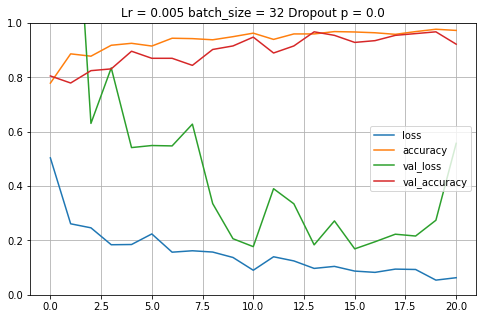

Lr = 0.005 batch_size = 32 Dropout p = 0.0
precision_score: 0.9761904761904762
recall_score: 0.8913043478260869
f1_score: 0.9318181818181818
accuracy_score: 0.9314285714285714
Epoch 20: early stopping


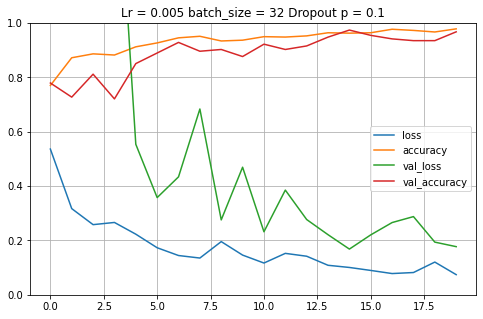

Lr = 0.005 batch_size = 32 Dropout p = 0.1
precision_score: 0.9574468085106383
recall_score: 0.9782608695652174
f1_score: 0.967741935483871
accuracy_score: 0.9657142857142857
Epoch 19: early stopping


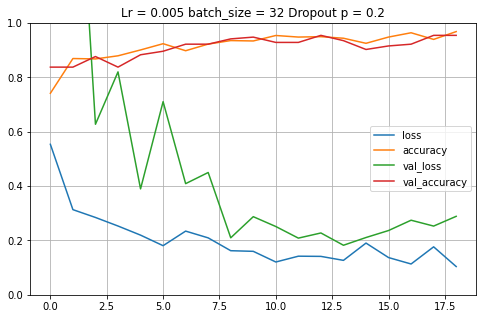

Lr = 0.005 batch_size = 32 Dropout p = 0.2
precision_score: 0.9545454545454546
recall_score: 0.9130434782608695
f1_score: 0.9333333333333332
accuracy_score: 0.9314285714285714
Epoch 12: early stopping


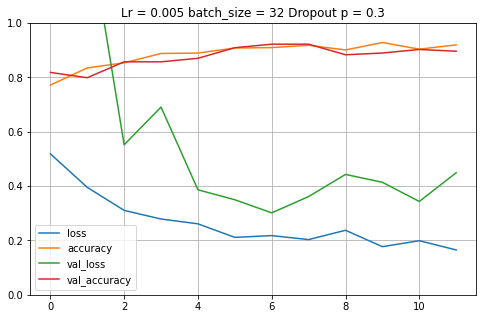

Lr = 0.005 batch_size = 32 Dropout p = 0.3
precision_score: 0.8924731182795699
recall_score: 0.9021739130434783
f1_score: 0.8972972972972973
accuracy_score: 0.8914285714285715
Epoch 12: early stopping


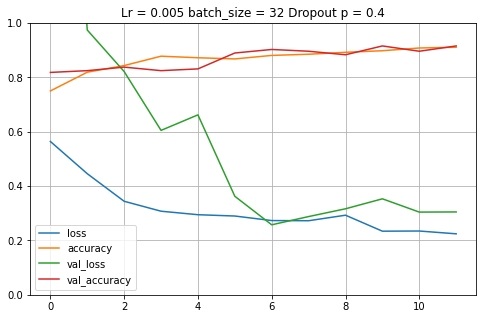

Lr = 0.005 batch_size = 32 Dropout p = 0.4
precision_score: 0.9230769230769231
recall_score: 0.9130434782608695
f1_score: 0.9180327868852459
accuracy_score: 0.9142857142857143
Epoch 19: early stopping


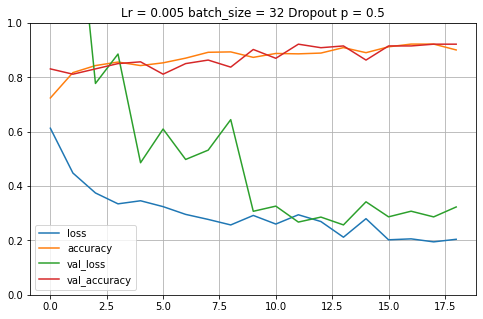

Lr = 0.005 batch_size = 32 Dropout p = 0.5
precision_score: 0.9
recall_score: 0.8804347826086957
f1_score: 0.8901098901098902
accuracy_score: 0.8857142857142857
Epoch 13: early stopping


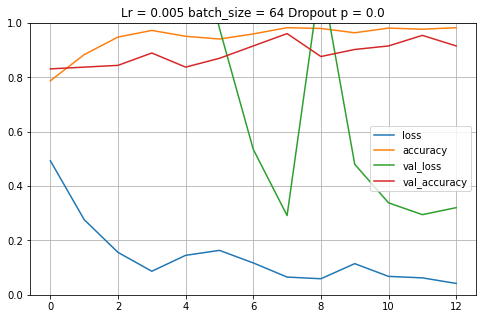

Lr = 0.005 batch_size = 64 Dropout p = 0.0
precision_score: 0.9368421052631579
recall_score: 0.967391304347826
f1_score: 0.9518716577540107
accuracy_score: 0.9485714285714286
Epoch 28: early stopping


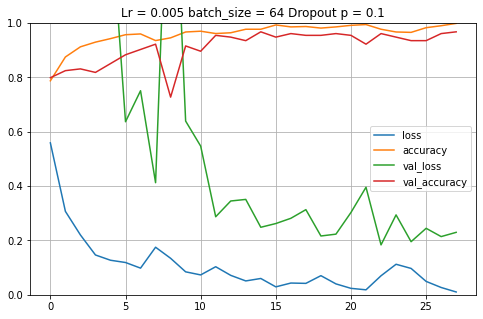

Lr = 0.005 batch_size = 64 Dropout p = 0.1
precision_score: 0.967741935483871
recall_score: 0.9782608695652174
f1_score: 0.972972972972973
accuracy_score: 0.9714285714285714
Epoch 23: early stopping


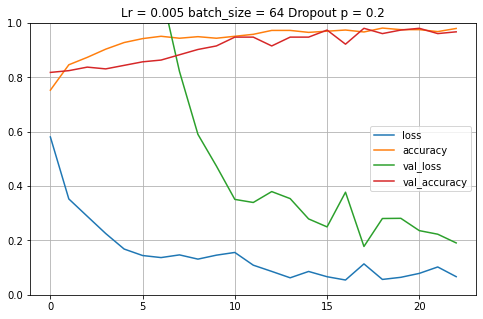

Lr = 0.005 batch_size = 64 Dropout p = 0.2
precision_score: 0.9574468085106383
recall_score: 0.9782608695652174
f1_score: 0.967741935483871
accuracy_score: 0.9657142857142857
Epoch 44: early stopping


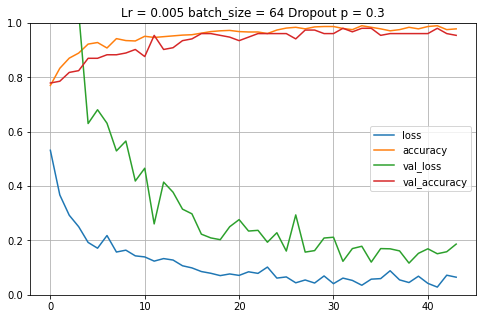

Lr = 0.005 batch_size = 64 Dropout p = 0.3
precision_score: 0.9775280898876404
recall_score: 0.9456521739130435
f1_score: 0.9613259668508287
accuracy_score: 0.96
Epoch 23: early stopping


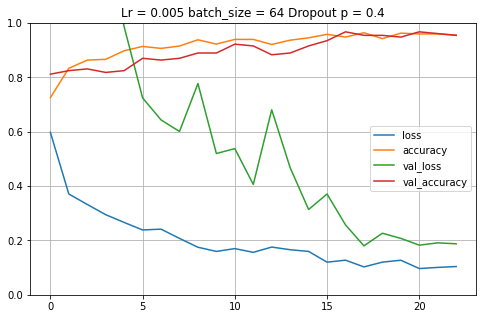

Lr = 0.005 batch_size = 64 Dropout p = 0.4
precision_score: 0.9375
recall_score: 0.9782608695652174
f1_score: 0.9574468085106383
accuracy_score: 0.9542857142857143
Epoch 25: early stopping


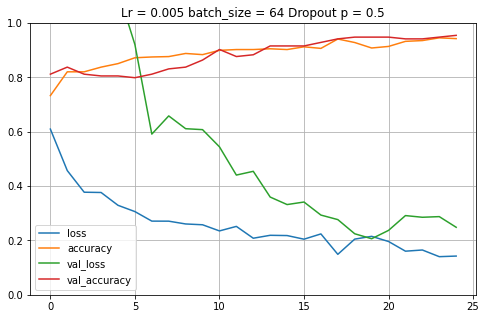

Lr = 0.005 batch_size = 64 Dropout p = 0.5
precision_score: 0.9263157894736842
recall_score: 0.9565217391304348
f1_score: 0.9411764705882354
accuracy_score: 0.9371428571428572
Epoch 10: early stopping


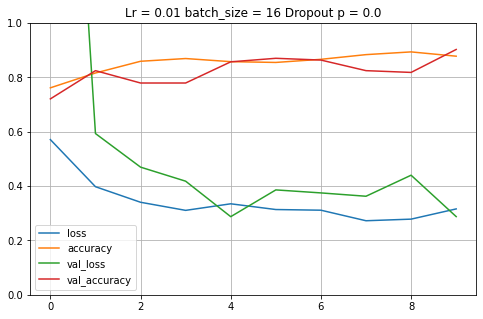

Lr = 0.01 batch_size = 16 Dropout p = 0.0
precision_score: 0.8936170212765957
recall_score: 0.9130434782608695
f1_score: 0.9032258064516129
accuracy_score: 0.8971428571428571
Epoch 26: early stopping


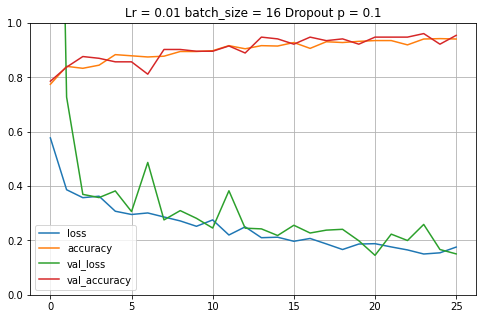

Lr = 0.01 batch_size = 16 Dropout p = 0.1
precision_score: 0.9550561797752809
recall_score: 0.9239130434782609
f1_score: 0.9392265193370166
accuracy_score: 0.9371428571428572
Epoch 16: early stopping


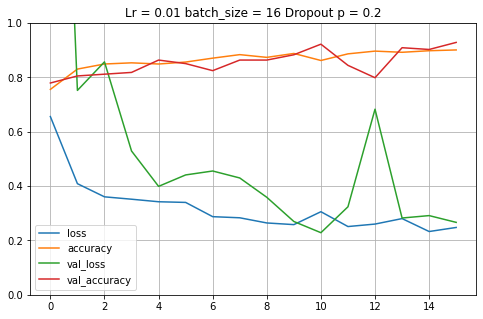

Lr = 0.01 batch_size = 16 Dropout p = 0.2
precision_score: 0.8979591836734694
recall_score: 0.9565217391304348
f1_score: 0.9263157894736843
accuracy_score: 0.92
Epoch 9: early stopping


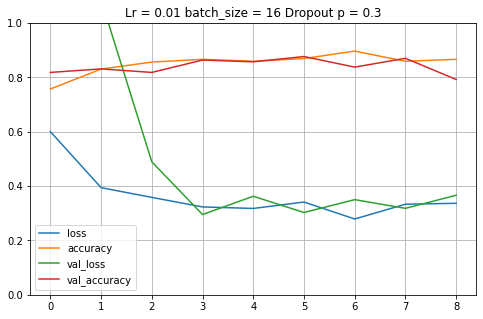

Lr = 0.01 batch_size = 16 Dropout p = 0.3
precision_score: 0.7767857142857143
recall_score: 0.9456521739130435
f1_score: 0.8529411764705882
accuracy_score: 0.8285714285714286
Epoch 19: early stopping


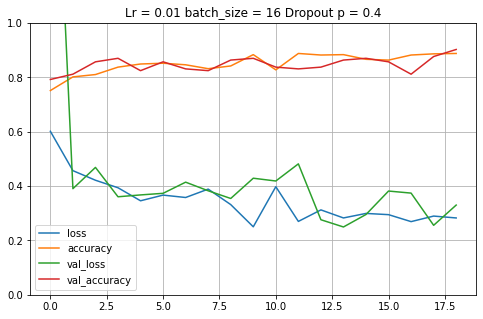

Lr = 0.01 batch_size = 16 Dropout p = 0.4
precision_score: 0.927710843373494
recall_score: 0.8369565217391305
f1_score: 0.8800000000000001
accuracy_score: 0.88
Epoch 12: early stopping


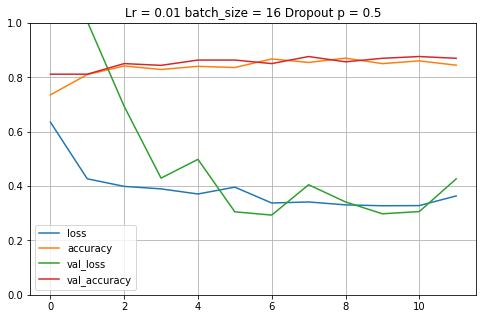

Lr = 0.01 batch_size = 16 Dropout p = 0.5
precision_score: 0.8735632183908046
recall_score: 0.8260869565217391
f1_score: 0.8491620111731845
accuracy_score: 0.8457142857142858
Epoch 25: early stopping


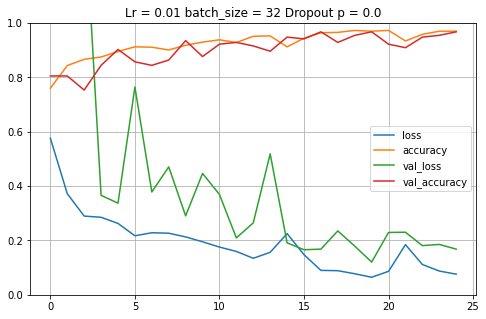

Lr = 0.01 batch_size = 32 Dropout p = 0.0
precision_score: 0.956989247311828
recall_score: 0.967391304347826
f1_score: 0.9621621621621621
accuracy_score: 0.96
Epoch 28: early stopping


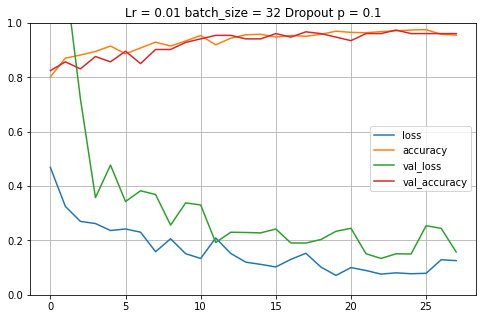

Lr = 0.01 batch_size = 32 Dropout p = 0.1
precision_score: 0.978021978021978
recall_score: 0.967391304347826
f1_score: 0.9726775956284153
accuracy_score: 0.9714285714285714
Epoch 22: early stopping


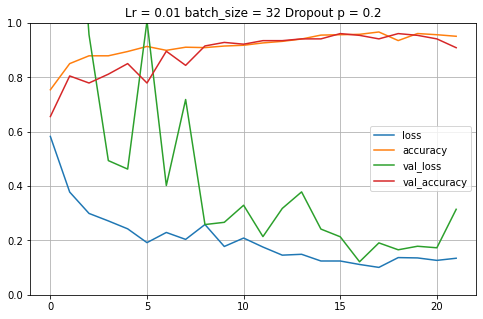

Lr = 0.01 batch_size = 32 Dropout p = 0.2
precision_score: 0.9647058823529412
recall_score: 0.8913043478260869
f1_score: 0.9265536723163841
accuracy_score: 0.9257142857142857
Epoch 28: early stopping


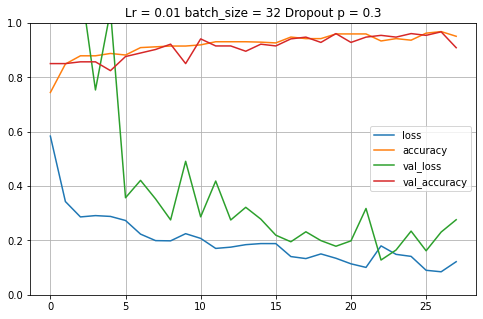

Lr = 0.01 batch_size = 32 Dropout p = 0.3
precision_score: 0.9375
recall_score: 0.9782608695652174
f1_score: 0.9574468085106383
accuracy_score: 0.9542857142857143
Epoch 19: early stopping


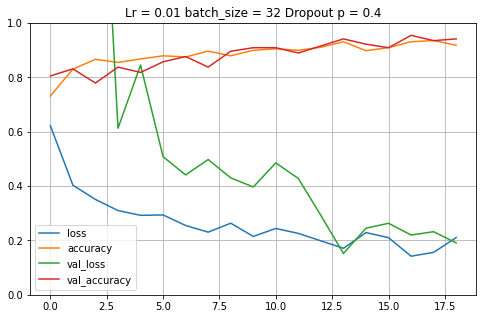

Lr = 0.01 batch_size = 32 Dropout p = 0.4
precision_score: 0.9444444444444444
recall_score: 0.9239130434782609
f1_score: 0.934065934065934
accuracy_score: 0.9314285714285714
Epoch 15: early stopping


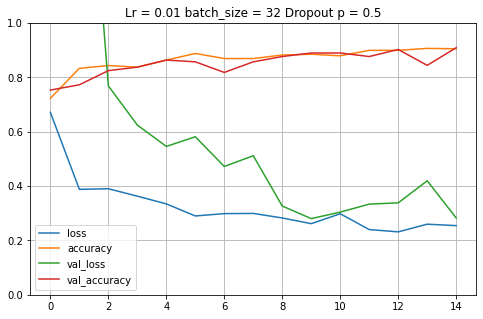

Lr = 0.01 batch_size = 32 Dropout p = 0.5
precision_score: 0.9318181818181818
recall_score: 0.8913043478260869
f1_score: 0.9111111111111111
accuracy_score: 0.9085714285714286
Epoch 25: early stopping


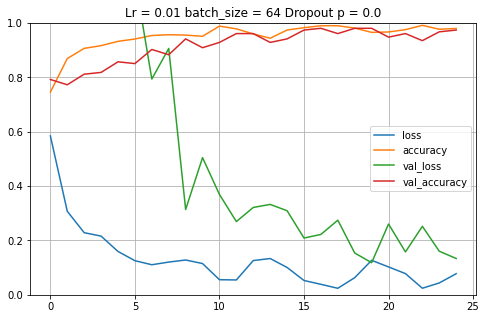

Lr = 0.01 batch_size = 64 Dropout p = 0.0
precision_score: 0.956989247311828
recall_score: 0.967391304347826
f1_score: 0.9621621621621621
accuracy_score: 0.96
Epoch 19: early stopping


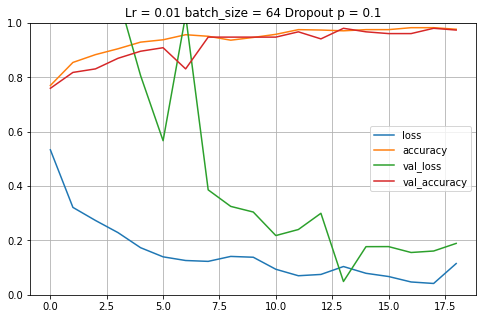

Lr = 0.01 batch_size = 64 Dropout p = 0.1
precision_score: 0.9468085106382979
recall_score: 0.967391304347826
f1_score: 0.956989247311828
accuracy_score: 0.9542857142857143
Epoch 26: early stopping


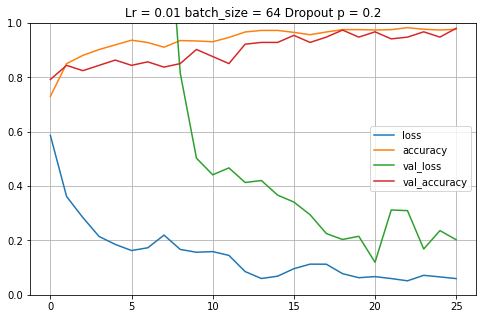

Lr = 0.01 batch_size = 64 Dropout p = 0.2
precision_score: 0.9574468085106383
recall_score: 0.9782608695652174
f1_score: 0.967741935483871
accuracy_score: 0.9657142857142857
Epoch 24: early stopping


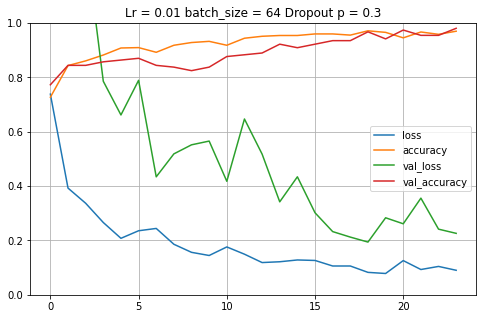

Lr = 0.01 batch_size = 64 Dropout p = 0.3
precision_score: 0.9777777777777777
recall_score: 0.9565217391304348
f1_score: 0.967032967032967
accuracy_score: 0.9657142857142857
Epoch 16: early stopping


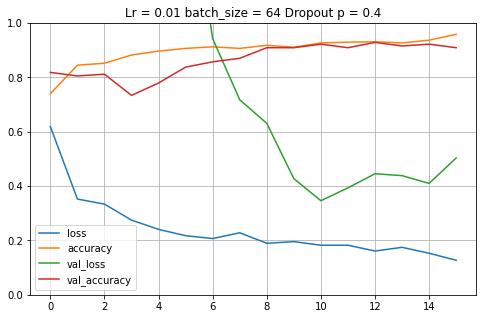

Lr = 0.01 batch_size = 64 Dropout p = 0.4
precision_score: 0.9186046511627907
recall_score: 0.8586956521739131
f1_score: 0.8876404494382023
accuracy_score: 0.8857142857142857
Epoch 14: early stopping


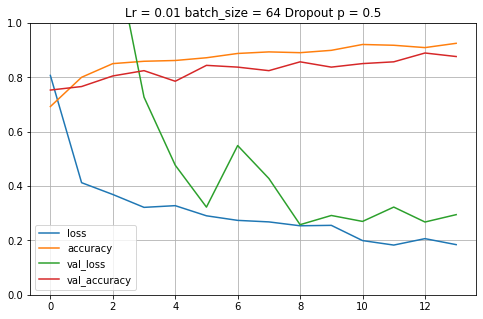

Lr = 0.01 batch_size = 64 Dropout p = 0.5
precision_score: 0.85
recall_score: 0.9239130434782609
f1_score: 0.8854166666666666
accuracy_score: 0.8742857142857143


In [308]:
from sklearn import  metrics

best_acc_HE = (None, 0, 0, 0, 0)
best_recall_HE = (None, 0, 0, 0, 0)

for lr in lr_list:
    for bs in batch_size_list:
        for p in dropout_p:
          if p:
            model = keras.Sequential([                
                Dense(1024,input_shape=[X_train.shape[1]], kernel_initializer=initializer),
                BatchNormalization(),
                Activation('relu'),
                Dropout(p),
                Dense(512, kernel_initializer=initializer),
                BatchNormalization(),
                Activation('relu'),
                Dropout(p),
                Dense(512, kernel_initializer=initializer),
                BatchNormalization(),
                Activation('relu'),
                Dropout(p),
                Dense(256, kernel_initializer=initializer),
                BatchNormalization(),
                Activation('relu'),
                Dropout(p),
                Dense(128, activation='relu', kernel_initializer=initializer),
                Dense(1, activation='sigmoid'),
            ])
            history = History()
            Adam = keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, amsgrad=False)
            model.compile(loss="binary_crossentropy", optimizer=Adam, metrics=["accuracy"]) #tf.keras.metrics.Recall()
            history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=bs, epochs=epochs, callbacks=[early_stopping], verbose=0)
            pd.DataFrame(history.history).plot(figsize=(8, 5))
            plt.grid(True)
            plt.gca().set_ylim(0, 1)
            plt.title('Lr = '+str(lr)+' batch_size = '+str(bs) + ' Dropout p = '+str(p))
            plt.show()
            y_pred = (model.predict(X_val)>0.5)
            print('Lr = '+str(lr)+' batch_size = '+str(bs) + ' Dropout p = '+str(p))
            print("precision_score: {}".format(metrics.precision_score(y_val, y_pred )))
            print("recall_score: {}".format( metrics.recall_score(y_val, y_pred )))
            print("f1_score: {}".format( metrics.f1_score(y_val, y_pred)))
            print("accuracy_score: {}".format( metrics.accuracy_score(y_val, y_pred)))
            if metrics.recall_score(y_val, y_pred) >= best_recall_HE[1]:
                best_recall_HE = (model, metrics.recall_score(y_val, y_pred), lr, bs, p)
            if metrics.accuracy_score(y_val, y_pred) >= best_acc_HE[1]:
                best_acc_HE = (model, metrics.accuracy_score(y_val, y_pred), lr, bs, p)
          else:
            model = keras.Sequential([             
                Dense(1024, input_shape=[X_train.shape[1]], kernel_initializer=initializer),
                BatchNormalization(),
                Activation('relu'),
                Dense(512, kernel_initializer=initializer),
                BatchNormalization(),
                Activation('relu'),
                Dense(512, kernel_initializer=initializer),
                BatchNormalization(),
                Activation('relu'),
                Dense(256, kernel_initializer=initializer),
                BatchNormalization(),
                Activation('relu'),
                Dense(128, activation='relu', kernel_initializer=initializer),
                Dense(1, activation='sigmoid'),
            ])
            history = History()
            Adam = keras.optimizers.Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, amsgrad=False)
            model.compile(loss="binary_crossentropy", optimizer=Adam, metrics=["accuracy"]) #tf.keras.metrics.Recall()
            history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=bs, epochs=epochs, callbacks=[early_stopping], verbose=0)
            pd.DataFrame(history.history).plot(figsize=(8, 5))
            plt.grid(True)
            plt.gca().set_ylim(0, 1)
            plt.title('Lr = '+str(lr)+' batch_size = '+str(bs) + ' Dropout p = '+str(p))
            plt.show()
            y_pred = (model.predict(X_val)>0.5)
            print('Lr = '+str(lr)+' batch_size = '+str(bs) + ' Dropout p = '+str(p))
            print("precision_score: {}".format(metrics.precision_score(y_val, y_pred )))
            print("recall_score: {}".format( metrics.recall_score(y_val, y_pred )))
            print("f1_score: {}".format( metrics.f1_score(y_val, y_pred)))
            print("accuracy_score: {}".format( metrics.accuracy_score(y_val, y_pred)))
            if metrics.recall_score(y_val, y_pred) >= best_recall_HE[1]:
                best_recall_HE = (model, metrics.recall_score(y_val, y_pred), lr, bs, p)
            if metrics.accuracy_score(y_val, y_pred) >= best_acc_HE[1]:
                best_acc_HE = (model, metrics.accuracy_score(y_val, y_pred), lr, bs, p)

In [380]:
from sklearn import  metrics

models = []
models.append(('Best recall', *best_recall))
models.append(('Best ACC', *best_acc))
models.append(('Best recall HE init', *best_recall_HE))
models.append(('Best ACC HE init', *best_acc_HE))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model, res , lr, bs, p in models:
    print(name,lr, bs, p)
    y_pred = (model.predict(X_val)>0.5)
    precision_score.append(metrics.precision_score(y_val, y_pred))
    recall_score.append(metrics.recall_score(y_val, y_pred))
    f1_score.append( metrics.f1_score(y_val, y_pred))
    accuracy_score.append(metrics.accuracy_score(y_val, y_pred))

res_val_d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
res_val = pd.DataFrame(data=res_val_d)
res_val.insert(loc=0, column='Method', value=[model[0] for model in models])
res_val


Best recall 0.005 64 0.2
Best ACC 0.0005 64 0.0
Best recall HE init 0.001 16 0.0
Best ACC HE init 0.001 64 0.2


Method  precision_score  recall_score  f1_score  \
0          Best recall         0.958333      1.000000  0.978723   
1             Best ACC         0.968421      1.000000  0.983957   
2  Best recall HE init         0.920000      1.000000  0.958333   
3     Best ACC HE init         0.978261      0.978261  0.978261   

   accuracy_score  
0        0.977143  
1        0.982857  
2        0.954286  
3        0.977143

In [367]:
def voting(models, X):
    y_pred = models[0].predict(X)
    for model in models[1:]:
      y_pred += model.predict(X)
    return y_pred/len(models)

In [382]:
from sklearn import  metrics

models = []
models.append(('Best recall', *best_recall))
models.append(('Best ACC', *best_acc))
models.append(('Best recall HE init', *best_recall_HE))
models.append(('Best ACC HE init', *best_acc_HE))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model, res , lr, bs, p in models:
    print(name,lr, bs, p)
    y_pred = (model.predict(X_test)>0.5)
    #print("precision_score: {}".format(metrics.precision_score(y_test, y_pred )))
    #print("recall_score: {}".format( metrics.recall_score(y_test, y_pred )))
    #print("f1_score: {}".format( metrics.f1_score(y_test, y_pred)))
    #print("accuracy_score: {}".format( metrics.accuracy_score(y_test, y_pred)))
    precision_score.append(metrics.precision_score(y_test, y_pred))
    recall_score.append(metrics.recall_score(y_test, y_pred))
    f1_score.append( metrics.f1_score(y_test, y_pred))
    accuracy_score.append(metrics.accuracy_score(y_test, y_pred))

models.append(('voting', None))
committee = [best_acc_HE[0], best_recall_HE[0], best_acc[0], best_recall[0]]
y_pred = (voting(committee, X_test)>0.5)
precision_score.append(metrics.precision_score(y_test, y_pred))
recall_score.append(metrics.recall_score(y_test, y_pred))
f1_score.append( metrics.f1_score(y_test, y_pred))
accuracy_score.append(metrics.accuracy_score(y_test, y_pred))


res_d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
res = pd.DataFrame(data=res_d)
res.insert(loc=0, column='Method', value=[model[0] for model in models])
res

Best recall 0.005 64 0.2
Best ACC 0.0005 64 0.0
Best recall HE init 0.001 16 0.0
Best ACC HE init 0.001 64 0.2


Method  precision_score  recall_score  f1_score  \
0          Best recall         0.950000      1.000000  0.974359   
1             Best ACC         0.974359      1.000000  0.987013   
2  Best recall HE init         0.915663      1.000000  0.955975   
3     Best ACC HE init         0.974026      0.986842  0.980392   
4               voting         0.950000      1.000000  0.974359   

   accuracy_score  
0        0.974026  
1        0.987013  
2        0.954545  
3        0.980519  
4        0.974026

In [383]:
model = best_acc[0]

In [384]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [390]:
def predict_heart_disease_likelihood(model, data,patient_id, more_details = False):
    df = pd.DataFrame(data={'patient id': patient_id, 'likelihood of heart disease': list(map(lambda x: '{:,.2%}'.format(x), model.predict(data).flatten())),}).set_index('patient id')
    display(df)

def features_explanation(model, data_visualization):
    e = shap.KernelExplainer(model, shap.sample(X_train, 100))
    shap_values = e.shap_values(data_visualization)
    shap.initjs()
    shap.summary_plot(shap_values[0], data_visualization, feature_names=df.columns)


True value  1


likelihood of heart disease
patient id                            
527                             99.98%

  0%|          | 0/1 [00:00<?, ?it/s]

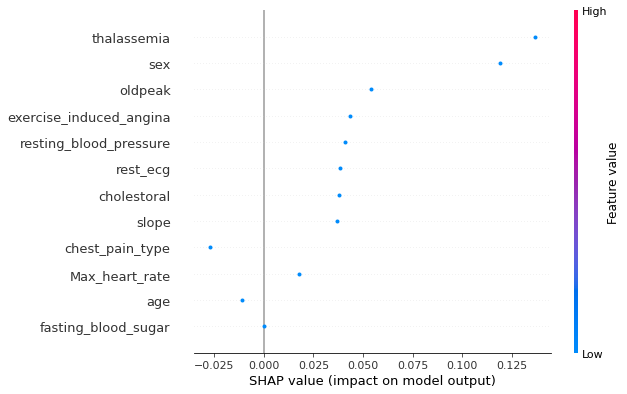

In [392]:
data_visualization = X_test[0].reshape(1, 12)
print('True value ',y_test.iloc[0])
predict_heart_disease_likelihood(model, data_visualization,
                                 y_test.index[0])
features_explanation(model, data_visualization)

True value  0


likelihood of heart disease
patient id                            
447                              0.10%

  0%|          | 0/1 [00:00<?, ?it/s]

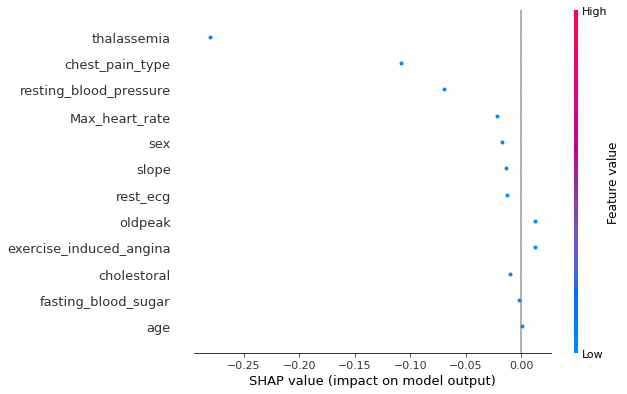

In [393]:
data_visualization = X_test[2].reshape(1, 12)
print('True value ',y_test.iloc[2])
predict_heart_disease_likelihood(model, data_visualization,y_test.index[2])
features_explanation(model, data_visualization)

true value 1


likelihood of heart disease
patient id                            
715                             50.31%

  0%|          | 0/1 [00:00<?, ?it/s]

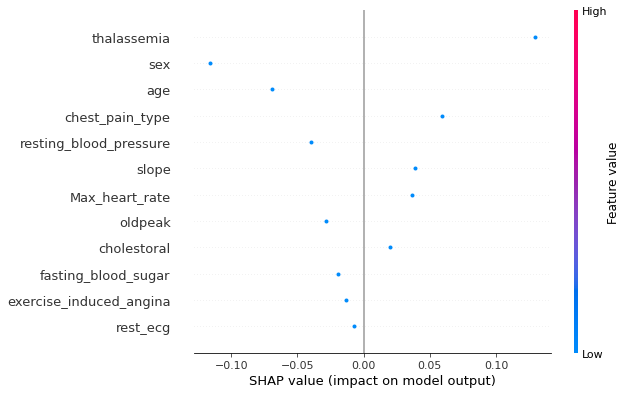

In [394]:
data_visualization = X_test[84].reshape(1, 12)
print("true value", y_test.iloc[84])
predict_heart_disease_likelihood(model, data_visualization,y_test.index[84])
features_explanation(model, data_visualization)

  0%|          | 0/154 [00:00<?, ?it/s]

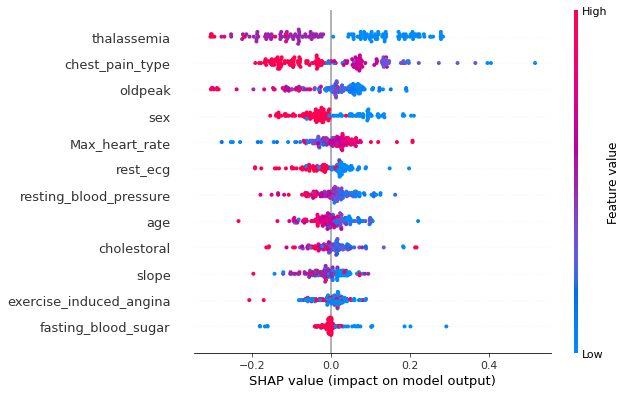

In [395]:
features_explanation(model, X_test)